<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395 Introducción a las Redes Neuronales Artificiales </h1>

<H3 align='center'> Tema 1 - Ejemplos Prácticos (Borrador) </H3>

----

<H3 align='center'> <b>Profesores: Ricardo Ñanculef, Carlos Valle </b> </H3>
<H3 align='center'> <b>Ayudantes: Álvaro Fuentes,Miguel Huerta </b> </H3>



<hr style="height:2px;border:none"/>


# Herramientas

Aquí se describen algunas herramientas que usaremos a lo largo del curso.

## Jupyter Notebooks & Google Colaboratory


####  Jupyter 
<p><img alt="Colaboratory logo" height="45px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/1200px-Jupyter_logo.svg.png" align="left" hspace="10px" vspace="0px">  </p>  

**Project Jupyter** es un proyecto open-source que busca apoyar la ciencia de datos y computación científica en todos los lenguajes de programación.

**Jupyter Notebook** es una aplicación web open-source que permite crear y compartir documentos que contienen código, ecuaciones, visualizaciones y texto.

Vamos a trabajar sobre archivos .ipynb llamados **notebooks** (ahora mismo estas leyendo un notebook) ejecutando código en **Python 3.X**. 
 
Existen diversas formas para trabajar sobre un notebook en tu computador, entre ellas se encuenta:
- Instalar JupyterLab vía conda o pip (package installer for Python) (más info: https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html)
- Instalar una distribución de Anaconda. Esta incluye Python, Jupyter Notebook y otros paquetes de uso común para la computación científica (sitio oficial: https://www.anaconda.com/)
-En Google Colaboratory (descrito en la siguiente sección).

Tutorial introductorio a Jupyter Notebook: 
https://realpython.com/jupyter-notebook-introduction/






<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

#### ¿Qué es Colaboratory? 



Colaboratory, también llamado "Colab", te permite ejecutar y programar en Python en tu navegador con las siguientes ventajas:
- No requiere configuración
- Da acceso gratuito a GPUs
- Permite compartir contenido fácilmente
- Cargar datos desde Google Drive

Puedes importar un conjunto de datos, entrenar un clasificador con dicho conjunto de datos y evaluar el modelo con pocas líneas de código. 

Los **notebooks de Colab** ejecutan código en los servidores en la nube de Google, lo que te permite aprovechar la potencia del hardware de Google, incluidas las GPU y TPU.

*Desventaja:* 
- Tiempos de cómputo a merced de Google.
- RAM limitada.
- Desconexión.


In [28]:
# hacer la conexión a Google Drive

from google.colab import drive

colab_flag = True

if (colab_flag):
    drive.mount('/content/drive')


#path = '/content/drive/MyDrive/AyudantiaNN/T2'
path = '/content/drive/MyDrive/ANN-2021-I/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Ecosistema Básico 

Independiente de que plataforma ustedes decidan utilizar para crear y ejecutar notebooks, se les recomienda el uso de Python como lenguaje de programación. En las demostraciones prácticas de este curso utilizaremos además todo el ecosistema de este lenguaje para data science y machine learning. 



In [2]:
# NumPy es una librería fundamental para la computación científica en Python.
import numpy as np

# Matplotlib es una librería para la creación de visualizaciones estáticas, animadas e interactivas en Python.
import matplotlib.pyplot as plt

# Pandas es una librería que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar en Python. Facilitará el manejo de los datos.
import pandas as pd

## Librerías para Deep Learning

Los ejercicios y demostraciones prácticas de este curso se construirán utilizando principalmente Keras y Tensorflow como backend. Ocasionalmente, se podría emplear también Pytorch.

**TensorFlow** es una plataforma de código abierto para el **aprendizaje automático**. Facilita la creación modelos de aprendizaje automático para computadoras de escritorio, dispositivos móviles, la web y la nube.


**Keras** es una API de Deep Learning escrita en Python, que se ejecuta sobre la plataforma de TensorFlow. Permite crear prototipos rápidamente, llevar a cabo investigaciones y producir resultados con una API fácil de usar para definir y entrenar Redes Neuronales Artificiales. (https://keras.io/about/)

**Torch** es un framework de computación científica con amplio soporte para algoritmos de Machine Learning. PyTorch es una librería Python de tensores  optimizada para el Deep Learning mediante GPU y CPU basada en Torch.


In [3]:
import tensorflow as tf
from tensorflow import keras
import torch

# **Ejemplo 1: De Neuronas a Redes**

## Modelo de Neurona Artificial

Hemos visto que una neurona efectúa esencialmente una combinación lineal de los $d$ datos que recibe, sustrae a eso su umbral de excitación y finalmente pasa el resultado por una no-linealidad g.

\begin{align}
a = g(p) = g(w^Tx - b) = g\left(\sum\nolimits_i w_i x_i - b\right)
\end{align}

Para implementar esto, nos basta crear un vector $w \in \mathbb{R}^d$ que representa los pesos de la neurona, una constante $b \in \mathbb{R}$ que represente el umbral de excitación y un vector $x \in \mathbb{R}^d$ que contiene los valores que consumirá para efectuar cálculos. Como no-linealidad usaremos una clásica *sigmoid*.




tensor([[-0.1161, -0.7663]])
tensor([[0.5317],
        [0.3846]])
0.339131623506546
Función de Activación


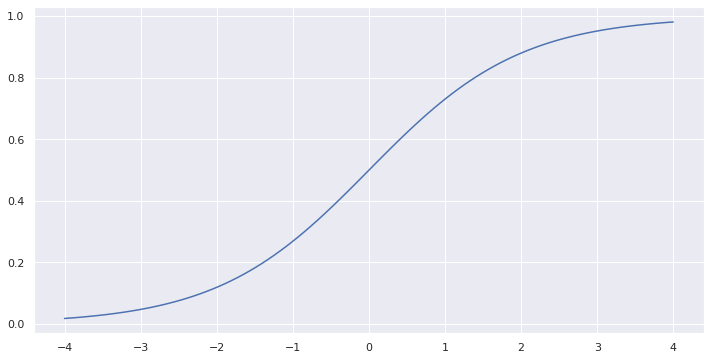

In [4]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()

d = 2
w = torch.randn(1, d)
x = torch.randn(d, 1)
b = torch.randn(1, 1)

def sigmoid_activation(z):
    return 1 / (1 + torch.exp(-z))

p = torch.mm(w,x) - b
a = sigmoid_activation(p)

print(w)
print(x)
print(a.item())

print("Función de Activación")
fig, ax = plt.subplots(1, 1,figsize=(12, 6))
z = np.linspace(-4,4,100)
plt.plot(z,(1 + np.exp(-z))**-1)
plt.show()

## Capacidad de una Neurona Individual

Podemos visualizar el "concepto" que reconoce la neurona interpretando su activación como un discriminante en $\mathbb{R}^d$. Como hemos discutido en clases, una neurona individual (binaria) implementa un frontera lineal en el espacio de los datos que consume, activándose en un lado de ese hiper-plano.



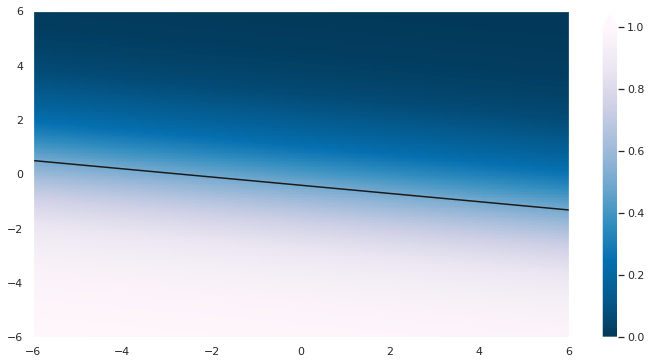

In [5]:

coord_1, coord_2  = np.mgrid[-6:6:200j, -6:6:200j]
X = torch.FloatTensor(np.transpose(np.c_[coord_1.ravel(), coord_2.ravel()]))

P = torch.mm(w,X) - b
A = sigmoid_activation(P)
#A = (A > 0.5).float() * 1

A = A.reshape(coord_1.shape) # 200x200

#Obtenemos la ecuación de la frontera
xx = np.linspace(-6, 6)

'''
Considerar una ecuación: 
      zz = w1*xx + w2*yy - b
=> zz/w2 = (w1/w2)*xx + y - b/w2

En zz = 0:

      0 = (w1/w2)*xx + yy - b/w2
=> yy = -(w1/w2)*xx + b/w2  (tenemos una recta)
'''
yy = -(w[0,0].item()/w[0,1].item())*xx + (b.item()/w[0,1].item())
#

fig, ax = plt.subplots(1, 1,figsize=(12, 6))
pcm = plt.pcolormesh(coord_1,coord_2, A, vmin=0, vmax=1, cmap='PuBu_r', shading='auto')
ax.set_ylim(-6,6)
fig.colorbar(pcm, ax=ax, extend='max') 
plt.plot(xx, yy, 'k-') # graficar la recta

plt.show()

## Entrenamiento de 1 Neurona

### Entrenamiento sobre 1 Ejemplo

Para entender la idea básica de cómo se organiza el algoritmo que permite entrenar una red, veamos qué sucede con 1 neurona y 1 ejemplo.



In [6]:
def plot_neurona(w,b,x=None):

  coord_1, coord_2  = np.mgrid[-6:6:200j, -6:6:200j]
  X = torch.FloatTensor(np.transpose(np.c_[coord_1.ravel(), coord_2.ravel()]))

  P = torch.mm(w,X) - b
  A = sigmoid_activation(P)
  #A = (A > 0.5).float() * 1

  A = A.reshape(coord_1.shape)

  xx = np.linspace(-1, 1)
  yy = -(w[0,0].item()/w[0,1].item())*xx + (b.item()/w[0,1].item())
  

  fig, ax = plt.subplots(1, 1,figsize=(12, 6))
  pcm = plt.pcolormesh(coord_1,coord_2, A, vmin=0, vmax=1, cmap='PuBu_r', shading='auto')
  fig.colorbar(pcm, ax=ax, extend='max')
  ax.set_ylim(-6,6)
  
  if x is not None:
    plt.plot(x[0,0].item(),x[1,0].item(), 'o')
  
  plt.plot()
  plt.show()


Antes del Entrenamiento:

ejemplo: ( 1.0 -1.0 )
activacion:  0.9041107296943665
deseado:  1.0
error:  0.00919475220143795
gradientes:  tensor([[-0.0166,  0.0166]]) tensor([[0.0166]])


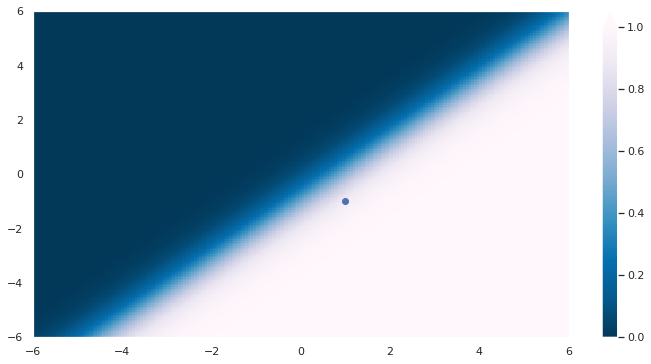

Entrenando ...
Listo ...

Después del Entrenamiento:

activacion:  0.9312605857849121
deseado:  1.0
error:  0.004725106991827488


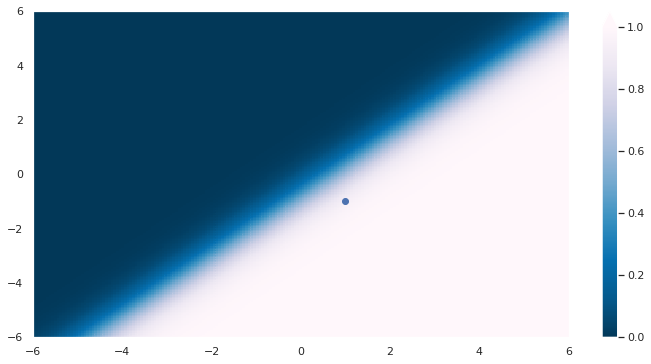

In [7]:

d = 2
w = torch.randn(1, d, requires_grad=True)
x = torch.empty(d, 1)

x[0, 0] = 1
x[1, 0] = -1

b = torch.randn(1, 1, requires_grad=True)

y = torch.tensor(1.0)

def sigmoid_activation(z):
    return 1 / (1 + torch.exp(-z))

p = torch.mm(w,x) - b
a = sigmoid_activation(p)
error = (y-a)**2
error.backward()

print("Antes del Entrenamiento:\n")
print("ejemplo: (",x[0,0].item(),x[1,0].item(),")")
print("activacion: ", a.item())
print("deseado: ", y.item())
print("error: ", error.item())
print("gradientes: ", w.grad, b.grad)

plot_neurona(w.clone().detach(),b.clone().detach(),x.clone().detach())

eta = torch.tensor(0.1)

print("Entrenando ...")

for epoch in range(100):

  p = torch.mm(w,x) - b
  a = sigmoid_activation(p)
  
  error = (y-a)**2
  error.backward()

  w.data -= eta*w.grad.data
  b.data -= eta*b.grad.data

  #print(w.grad.data)

  w.grad.data.zero_()
  b.grad.data.zero_()
  
print("Listo ...\n")

p = torch.mm(w,x) - b
a = sigmoid_activation(p)
error = (y-a)**2

print("Después del Entrenamiento:\n")
print("activacion: ", a.item())
print("deseado: ", y.item())
print("error: ", error.item())
#Visualizacion de la Neurona Despues del Entrenamiento
plot_neurona(w.clone().detach(),b.clone().detach(),x.clone().detach())



### Entrenamiento sobre Múltiples Ejemplos

Naturalmente, en la práctica las redes se usan múltiples ejemplos. Acá veremos como organizar el entrenamiento sobre un gran conjunto de datos usando lotes (mini batches).



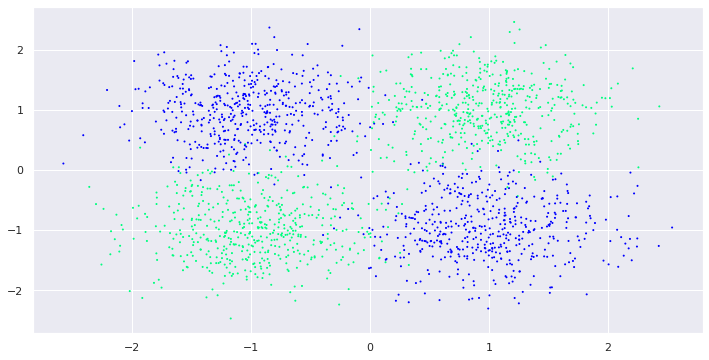

In [8]:
from sklearn.utils import shuffle

def do_gaussianXOR(n1=500,n2=500,u=1.0,std=0.5):
   
    primer_cluster = np.random.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_cluster = np.random.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_cluster = np.random.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_cluster = np.random.normal(loc=[u,-u],scale=std,size=(n2,2))
    
    X = np.vstack((primer_cluster,segundo_cluster,tercer_cluster,cuarto_cluster))
    Y = np.hstack((np.ones(n1),np.zeros(n2),np.ones(n1),np.zeros(n2))) 
    Y = np.expand_dims(Y, axis=1)

    return shuffle(X, Y.astype(int))
  

X_train,Y_train = do_gaussianXOR()
X_test,Y_test = do_gaussianXOR(1000,1000)

fig, axis = plt.subplots(1, 1,figsize=(12, 6))
axis.scatter(X_train[:,0], X_train[:,1], s=1, c=Y_train, cmap=plt.cm.winter)
plt.show()



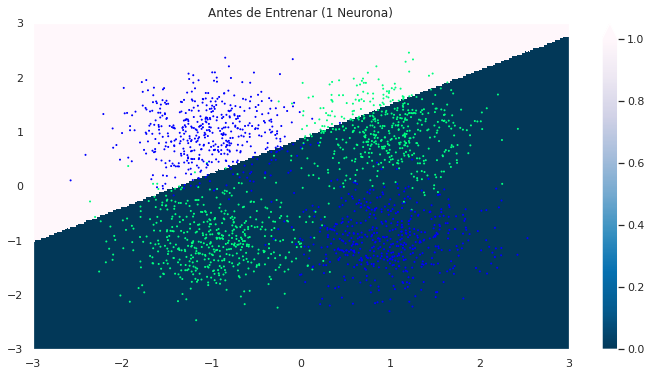

Accuracy antes del entrenamiento 0.33000001311302185


In [9]:
epsilon = 0.001
coord_1, coord_2  = np.mgrid[-3:3:200j, -3:3:200j]
X_plot = torch.FloatTensor(np.c_[coord_1.ravel(), coord_2.ravel()])

class FFUnit(torch.nn.Module):
  
    def __init__(self, input_dim):

        super().__init__()

        self.input_dim = input_dim

        self.W = torch.nn.Parameter(data=torch.Tensor(1, input_dim), requires_grad=True)  
        self.b = torch.nn.Parameter(data=torch.Tensor(1, 1), requires_grad=True)
        
        self.W.data.uniform_(-1.0, 1.0)
        self.b.data.uniform_(-1.0, 1.0)

        self.g = torch.nn.Sigmoid() #Algunas opciones: Tanh, Sigmoid, Softplus, ReLU

    def forward(self, x):

        x = torch.transpose(x, 0, 1)

        pre_activacion = torch.mm(self.W, x) - self.b
        activacion = self.g(pre_activacion) 

        activacion = torch.transpose(activacion, 0, 1)
        return activacion
    
    def pred(self, x):
        return (self.forward(x) > 0.5).float() * 1
        

def plot_model(A,X_train,Y_train,title=""):
  A = (A > 0.5) * 1
  fig, ax = plt.subplots(1, 1,figsize=(12, 6))
  pcm = plt.pcolormesh(coord_1,coord_2, A, vmin=0, vmax=1, cmap='PuBu_r', shading='auto')
  ax.scatter(X_train[:,0], X_train[:,1], s=1, c=Y_train, cmap=plt.cm.winter)
  fig.colorbar(pcm, ax=ax, extend='max')
  ax.set_title(title)
  plt.plot()
  plt.show()

x_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(Y_train)

x_val = torch.FloatTensor(X_test)
y_val = torch.FloatTensor(Y_test)

model = FFUnit(input_dim=2)

model.eval()

plot_model(model(X_plot).detach().numpy().reshape(coord_1.shape),X_train,Y_train,title="Antes de Entrenar (1 Neurona)")

pred_train = model.pred(x_train)

acc = (pred_train == y_train).float().mean()
print('Accuracy antes del entrenamiento' , acc.item())


Modelo entrenado!


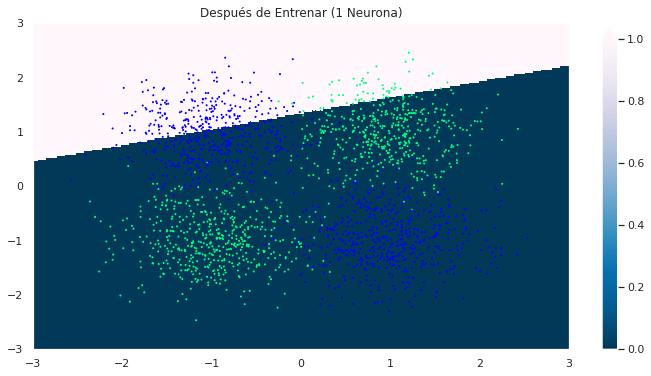

In [10]:

loss = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 1)

max_epochs = 10
size_batch = 1
n_batches = int(len(x_train)//size_batch)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

print_info = False

for epoch in range(max_epochs):
  
  model.train()

  for i in range(n_batches):

    optimizer.zero_grad()
    
    batch_x, batch_y = x_train[i*n_batches:(i+1)*n_batches,], y_train[i*n_batches:(i+1)*n_batches,]
    pred_y = model(batch_x)
    error = loss(pred_y,batch_y)
    
    error.backward()
    optimizer.step()

  model.eval()#modalidad evaluacion

  train_loss = loss(model(x_train), y_train)
  val_loss = loss(model(x_val), y_val)

  train_losses.append(train_loss.item())
  val_losses.append(val_loss.item())
    
  acc_train = (model.pred(x_train) == y_train).type(torch.FloatTensor).mean()
  acc_val = (model.pred(x_val) == y_val).type(torch.FloatTensor).mean()

  train_accuracies.append(acc_train.item())
  val_accuracies.append(acc_val.item())

  if print_info:
    print ("... Epoch:", epoch, "Training Loss: ", train_loss.item(), "Val Loss: ", val_loss.item(), "Train Acc: ", np.mean(batch_loss))

print("Modelo entrenado!")

plot_model(model(X_plot).detach().numpy().reshape(coord_1.shape),X_train,Y_train,title="Después de Entrenar (1 Neurona)")


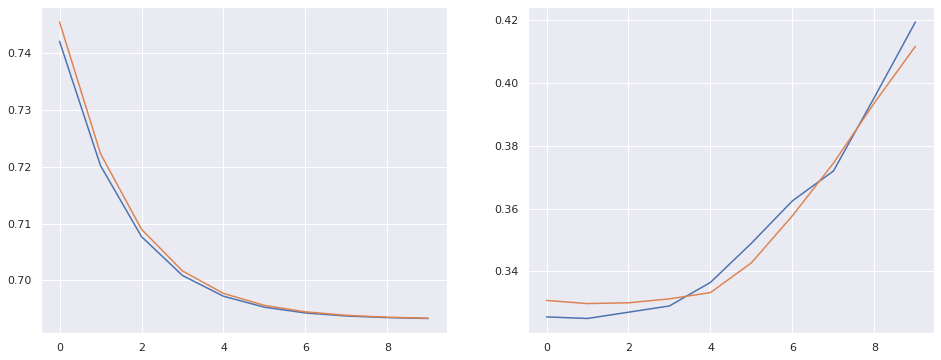

[0.3255000114440918] [0.3307499885559082]


In [11]:

fig, axis = plt.subplots(1, 2,figsize=(16, 6))
axis[0].plot(train_losses, label='training loss')
axis[0].plot(val_losses, label='val loss')
axis[1].plot(train_accuracies, label='training loss')
axis[1].plot(val_accuracies, label='val loss')
plt.show()

print(train_accuracies[:1],val_accuracies[:1])

## Capas Ocultas

Finalmente incluiremos capas ocultas en la red e intentaremos visualizar el efecto de estas capas en la capacidad de la red de resolver problemas.



### Arquitectura

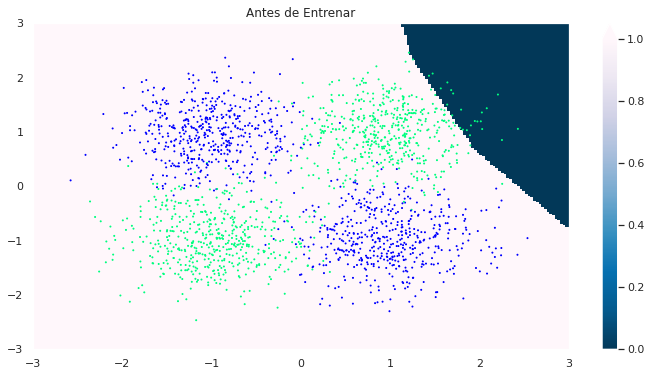

Accuracy antes del entrenamiento 0.4880000054836273


In [12]:

epsilon = 0.001
coord_1, coord_2  = np.mgrid[-3:3:200j, -3:3:200j]
X_plot = torch.FloatTensor(np.c_[coord_1.ravel(), coord_2.ravel()])

class FFUnit(torch.nn.Module):
  
    def __init__(self, input_dim):

        super().__init__()

        self.input_dim = input_dim

        self.fc1 = torch.nn.Linear(input_dim,5)# z = Wx-b
        self.fc2 = torch.nn.Linear(5, 1)#y = Uz - c

        self.g1 = torch.nn.ReLU() #Algunas opciones: Tanh, Sigmoid, Softplus, ReLU
        self.g2 = torch.nn.Sigmoid() #Algunas opciones: Tanh, Sigmoid, Softplus, ReLU

    def forward(self, x):

        pre_activacion_oculta = self.fc1(x)
        activacion_oculta = self.g1(pre_activacion_oculta) 

        pre_activacion_salida = self.fc2(activacion_oculta)
        activacion_salida = self.g2(pre_activacion_salida) 

        return activacion_salida
    
    def pred(self, x):

        return (self.forward(x) > 0.5).float() * 1
        

def plot_model(A,X_train,Y_train,title=""):
  A = (A > 0.5) * 1
  fig, ax = plt.subplots(1, 1,figsize=(12, 6))
  pcm = plt.pcolormesh(coord_1,coord_2, A, vmin=0, vmax=1, cmap='PuBu_r', shading='auto')
  ax.scatter(X_train[:,0], X_train[:,1], s=1, c=Y_train, cmap=plt.cm.winter)
  fig.colorbar(pcm, ax=ax, extend='max')
  ax.set_title(title)
  plt.plot()
  plt.show()

x_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(Y_train)

x_val = torch.FloatTensor(X_test)
y_val = torch.FloatTensor(Y_test)

model = FFUnit(input_dim=2)

model.eval()

plot_model(model(X_plot).detach().numpy().reshape(coord_1.shape),X_train,Y_train,title="Antes de Entrenar")

pred_train = model.pred(x_train)

acc = (pred_train == y_train).float().mean()
print('Accuracy antes del entrenamiento' , acc.item())


### Entrenamiento

Modelo entrenado!


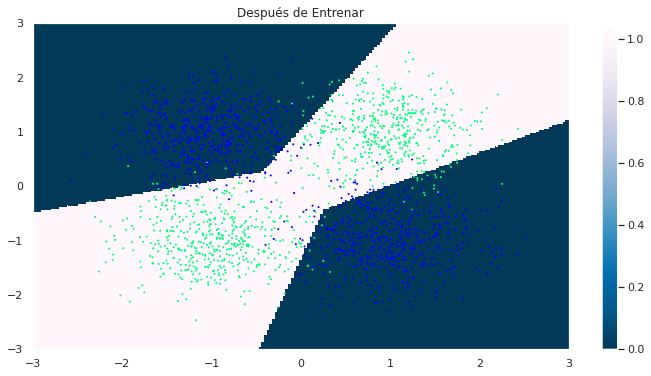

TRAIN ACC:  0.9390000104904175


In [13]:

optimizer = torch.optim.SGD(model.parameters(), lr =0.1)
loss = torch.nn.BCELoss()

max_epochs = 50
size_batch = 10
n_batches = int(len(x_train)//size_batch)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

print_info = False

for epoch in range(max_epochs):
  
  model.train()

  for i in range(n_batches):

    optimizer.zero_grad()
    
    batch_x, batch_y = x_train[i*n_batches:(i+1)*n_batches,], y_train[i*n_batches:(i+1)*n_batches,]
    pred_y = model(batch_x)
    error = loss(pred_y,batch_y)
    
    error.backward()
    optimizer.step()

  model.eval()#modalidad evaluacion

  train_loss = loss(model(x_train), y_train)
  val_loss = loss(model(x_val), y_val)

  train_losses.append(train_loss.item())
  val_losses.append(val_loss.item())
    
  acc_train = (model.pred(x_train) == y_train).type(torch.FloatTensor).mean()
  acc_val = (model.pred(x_val) == y_val).type(torch.FloatTensor).mean()

  train_accuracies.append(acc_train.item())
  val_accuracies.append(acc_val.item())
  
  if print_info:
    print ("... Epoch:", epoch, "Training Loss: ", train_loss.item(), "Val Loss: ", val_loss.item(), "Train Acc: ", np.mean(batch_loss))

print("Modelo entrenado!")

plot_model(model(X_plot).detach().numpy().reshape(coord_1.shape),X_train,Y_train,title="Después de Entrenar")

print("TRAIN ACC: ", train_accuracies[-1])


## Conclusiones Ejercicio 1

Esperamos que se haya convencido de que el "poder" de una neurona individual es muy reducido. Esencialmente, una neurona artificial estándar puede sólo aprender funciones lineales o discriminantes lineales. Esta es una de las conclusiones a las que llegó Misky y Papert en el famoso libro:

> Marvin Minsky and Seymour Papert, 1972 (2nd edition with corrections, first edition 1969) Perceptrons: An Introduction to Computational Geometry, The MIT Press, Cambridge MA, ISBN 0-262-63022-2.

Esperamos que entienda entonces que el "poder" de una red neuronal no radica en el "poder" de una neurona individual sino en el colectivo. La capacidad que emerge al incorporar capas ocultas en una red es de hecho sorprendente: con suficientes neuronas escondidas, una red feed-forward puede aprenderr prácticamente cualquier función de interés práctico. Esta es una de las conclusiones en el famoso trabajo de Cybenko:

> Cybenko, G. (1989) "Approximation by superpositions of a sigmoidal function", Mathematics of Control, Signals, and Systems, 2(4), 303–314. doi:10.1007/BF02551274






# Ejemplo 2: Redes Feed-forward en la API Funcional de Keras

En este ejemplo, mostramos como crear Redes Feed-foward profundas con pocas lineas de código usando Keras.



#### **El Modelo Secuencial**

Es apropiado para un **stack simple de capas** en la red neuronal, donde cada capa tiene exactamente un tensor de entrada y un tensor de salida. 

Los **tensores** pueden considerarse matrices multidimensionales con un tipo uniforme (llamado dtype). Recordando NumPy, los tensores son "parecidos" a los np.arrays 
(Leer https://www.tensorflow.org/guide/tensor para más info.)


Un modelo secuencial se puede crear de forma incremental a través del **método add()**

In [14]:
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(3,)))
model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(4, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


#### **La API funcional**


La API funcional es una forma de crear modelos dinámicos. Puede manejar modelos con topología no lineal, modelos con capas compartidas y modelos con múltiples entradas o salidas.

Model: "MyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MyInput (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 12)                84        
_________________________________________________________________
MyOutput (Dense)             (None, 4)                 52        
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


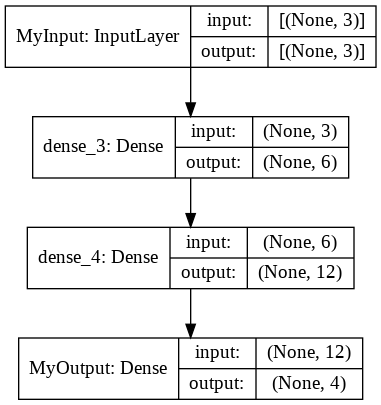

In [15]:

inputs = keras.Input(shape=(3,), name='MyInput')
x = layers.Dense(6, activation='relu')(inputs)
x = layers.Dense(12, activation='relu')(x)
outputs = layers.Dense(4, activation='softmax', name='MyOutput')(x)
 
model = keras.Model(inputs=inputs, outputs=outputs, name='MyModel')
model.summary()

# Notar que el Output Shape de las capas tiene un valor None. 
# Significa que tenemos un tamaño desconocido para la dimension correspondiente al tamaño del batch. Dicho valor lo definiremos en el entrenamiento.
keras.utils.plot_model(model, show_shapes=True)

## Random 4-class Classification Problem

Resolver un problema sencillo usando un modelo funcional de Keras. Consideremos la clasificación de 4 clases agrupadas en clusters, cada una con 3 features.

### Generar datos

(8000, 3) (8000,)
Clases:  ['0' '1' '2' '3']


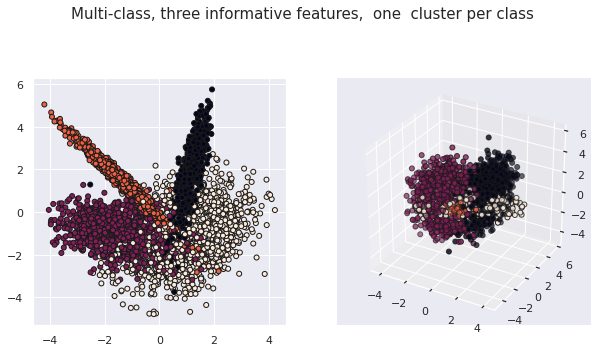

In [16]:
from sklearn.datasets import make_classification


fig = plt.figure(figsize=(10, 10))
fig.suptitle("Multi-class, three informative features,  one  cluster per class", fontsize = 15)

# Generate a random n-class classification problem.
n_samples = 8000
n_features = 3
n_classes = 4

X1, Y1 = make_classification( n_samples = n_samples, n_features=n_features, n_redundant=0, n_informative=n_features,
                             n_clusters_per_class=1, n_classes = n_classes, random_state = 1)

# First subplot
ax1 = fig.add_subplot(2, 2, 1) 
ax1.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

# Second subplot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(X1[:, 0], X1[:, 1], X1[:, 2], marker='o', c=Y1, s=25, edgecolor='k')

print(X1.shape, Y1.shape)

clases = np.unique([str(item) for item in Y1])
print("Clases: ", clases)

In [17]:
# Como buscamos clasificar no sería correcto predecir valores númericos como 0, 1, 2 o 3 (no tiene sentido decir que la cuarta clase es 3 veces la segunda clase) 
# Debemos obtener one-hot encoding para clasificar

Y1_ = tf.one_hot(Y1, depth=n_classes).numpy()

print("\nEtiquetas Y:\n")
print("..antes del one-hot:")
print(Y1)
print("\n..después del one-hot:")
print(Y1_)

print("\nNuevo shape: ")
print(Y1_.shape)


Etiquetas Y:

..antes del one-hot:
[2 2 0 ... 3 2 3]

..después del one-hot:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Nuevo shape: 
(8000, 4)


In [18]:
from sklearn.model_selection import train_test_split

_validation_split = 0.2

# Split de los ejemplos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X1, Y1_, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=_validation_split, random_state=0)

print("X,y Shapes:", X1.shape, Y1_.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)


X,y Shapes: (8000, 3) (8000, 4)
X,y Train Shapes: (5120, 3) (5120, 4)
X,y Val Shapes: (1280, 3) (1280, 4)
X,y Test Shapes: (1600, 3) (1600, 4)


In [19]:
from sklearn.preprocessing import StandardScaler

'''
En muchos problemas con features numéricos, estandarizar los datos antes de aplicar un modelo nos podría ayudar 
a obtener mejores resultados, sobre todo cuando los rangos de valores son muy diferentes para diferentes features
(aunque en este problema particular, no es tan relevante).

WARNING: cuidado con aplicar esto antes de separar en train, validation y test.
 Si aplicamos una función como StandardScaler() con todos los datos (sin la separación) 
 haremos que el futuro conjunto de test deje de ser independiente del conjunto train. 
 Esto puede provocar que el modelo tenga un buen rendimiento en testing cuando en realidad 
 el modelo simplemente aprovecha que los datos test hayan sido escalados junto a train. 
 En otras palabras: ¡esta haciendo trampa!... y se pierde el propósito de usar un conjunto train.
'''

# Scaling de datos
scaling = True

if (scaling):
    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


### El modelo funcional

n_features:  3
n_classes:  4
Model: "ModeloFuncRandomClass"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_3_features (InputLayer [(None, 3)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
Output (Dense)               (None, 4)                 84        
Total params: 344
Trainable params: 344
Non-trainable params: 0
_________________________________________________________________


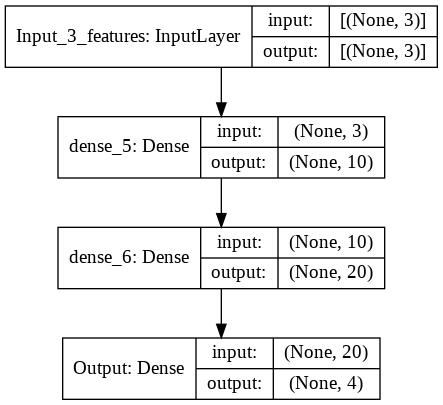

In [20]:
n_features = X_train.shape[1]
n_classes = y_train.shape[1] 

print("n_features: ", n_features)
print("n_classes: ", n_classes)

inputs = keras.Input(shape=(n_features, ), name='Input_3_features')
x = layers.Dense(10, activation='relu')(inputs)
x = layers.Dense(20, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax', name='Output')(x)
 
model1 = keras.Model(inputs=inputs, outputs=outputs, name='ModeloFuncRandomClass')
model1.summary()

keras.utils.plot_model(model1, show_shapes=True)

In [21]:
# Compilar el modelo. Se utiliza loss Categorical Crossentropy y métrica Accuracy
model1.compile(loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

_batch_size = 128 # Numero de ejemplos por gradient update.

n_mini_batchs = int(np.ceil(X_train.shape[0] / _batch_size)) 
         
print("Ejemplos de entrenamiento: {n_t}".format(n_t = X_train.shape[0] ) )
print("Número de mini-batch por epoch: ", n_mini_batchs)

# Entrenar modelo
history = model1.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=10,
    verbose=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)


Ejemplos de entrenamiento: 5120
Número de mini-batch por epoch:  40
Epoch 1/10
40/40 - 1s - loss: 1.1704 - accuracy: 0.5275 - val_loss: 1.0783 - val_accuracy: 0.6375
Epoch 2/10
40/40 - 0s - loss: 0.9694 - accuracy: 0.6818 - val_loss: 0.9231 - val_accuracy: 0.6797
Epoch 3/10
40/40 - 0s - loss: 0.8248 - accuracy: 0.7357 - val_loss: 0.7995 - val_accuracy: 0.7312
Epoch 4/10
40/40 - 0s - loss: 0.7157 - accuracy: 0.7682 - val_loss: 0.7095 - val_accuracy: 0.7656
Epoch 5/10
40/40 - 0s - loss: 0.6354 - accuracy: 0.7861 - val_loss: 0.6440 - val_accuracy: 0.7836
Epoch 6/10
40/40 - 0s - loss: 0.5793 - accuracy: 0.8006 - val_loss: 0.5953 - val_accuracy: 0.7922
Epoch 7/10
40/40 - 0s - loss: 0.5387 - accuracy: 0.8111 - val_loss: 0.5602 - val_accuracy: 0.8008
Epoch 8/10
40/40 - 0s - loss: 0.5093 - accuracy: 0.8201 - val_loss: 0.5329 - val_accuracy: 0.8070
Epoch 9/10
40/40 - 0s - loss: 0.4867 - accuracy: 0.8283 - val_loss: 0.5113 - val_accuracy: 0.8148
Epoch 10/10
40/40 - 0s - loss: 0.4684 - accuracy: 

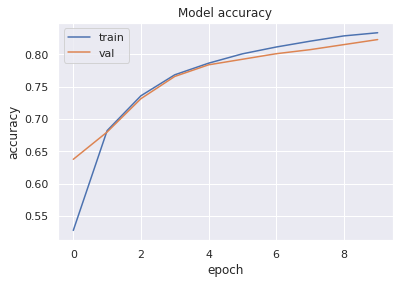

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
# Una vez tengamos el modelo definido tras probar con el set de validación, podemos ver su capacidad en el conjunto de test
# Predecir datos de test con el modelo entrenado
Y_pred = model1.predict(X_test)

print("Predicciones para los 3 primeros ejemplos de validación: ") 
print(Y_pred[0:3])

print("\nNotar que cada uno suma 1 gracias a la Softmax (probabilidad válida)")
print(np.sum(Y_pred[0]))

Predicciones para los 3 primeros ejemplos de validación: 
[[1.0003293e-01 1.4210770e-01 6.3862361e-02 6.9399697e-01]
 [9.0051067e-01 8.2278237e-02 4.0703214e-04 1.6804062e-02]
 [7.2605457e-05 9.8702091e-01 1.0297978e-02 2.6084227e-03]]

Notar que cada uno suma 1 gracias a la Softmax (probabilidad válida)
0.99999994


In [24]:

# Obtener clase con activación más alta (mayor probabilidad) para todas las predicciones. 
Y_pred = np.argmax(Y_pred, axis=1)

print(Y_pred[0:20])

# Encodear como one-hot para comparar con el output esperado
Y_pred = tf.one_hot(Y_pred, depth=4).numpy()

print()
print(Y_pred)

[3 0 1 1 2 3 2 0 3 1 2 1 3 2 2 0 3 2 0 2]

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


Model Accuracy sobre conjunto Test: 
0.833125

Confusion Matrix



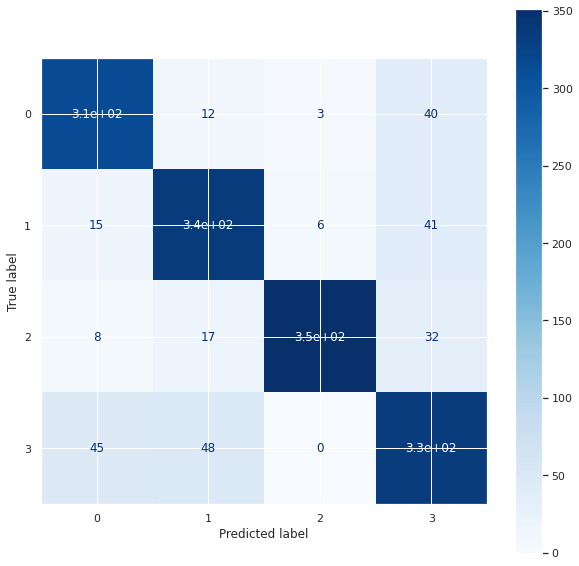

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       368
           1       0.81      0.84      0.83       397
           2       0.97      0.86      0.91       408
           3       0.75      0.78      0.76       427

   micro avg       0.83      0.83      0.83      1600
   macro avg       0.84      0.83      0.84      1600
weighted avg       0.84      0.83      0.83      1600
 samples avg       0.83      0.83      0.83      1600



In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("Model Accuracy sobre conjunto Test: ")
print(accuracy_score(y_test, Y_pred))


target_names = [str(i) for i in range(4)]


print("\nConfusion Matrix\n")
fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(y_test.argmax(axis=1), Y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()


np.set_printoptions(precision=2)
print(classification_report(y_test, Y_pred))

# Ejemplo 3 (Opcional) NASA JPL Asteroid Dataset 

Este ejemplo no será revisado en clases, pero queda como material de estudio.

![Asteroid](https://www.sciencenewsforstudents.org/wp-content/uploads/2019/11/860_meteorite_diamonds.png)

En él, mostramos algunos pasos para trabajar sobre un **dataset real**.  En este ejemplo en particular, vamos a trabajar sobre un dataset que contiene todo tipo de datos relacionados a asteroides. Los datos provienen del Jet Propulsion Laboratory (organización manejada por NASA) y pueden ser descargados desde: 

https://www.kaggle.com/sakhawat18/asteroid-dataset

El objetivo será  **Predecir la clase de un asteroide** a partir de características numéricas del objeto utilizando una red FF. 


In [ ]:
if (colab_flag):

    # https://www.kaggle.com/sakhawat18/asteroid-dataset

    # cambie esta ruta a la necesaria según sea el caso.  
    data_asteroid = pd.read_csv(path + '/Asteroid_dataset.csv' ,header=0,engine='python')
    print(data_asteroid.shape)
else:
    data_asteroid = pd.read_csv('/Asteroid_dataset.csv' ,header=0,engine='python')

(958524, 45)


In [ ]:
# con head() podemos dar un vistazo al contenido
print(data_asteroid.shape)
data_asteroid.head()

(958524, 45)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Al trabajar con dataset reales, muchas veces no estarán los datos completos: puede que existan celdas sin valores (NaN) o datos que deben ser "limpiados" antes de aplicar un modelo. Por ejemplo, podremos tener valores perdidos, valores erróneos, valores no usables, etc. 

En este dataset revisaremos cuantos datos faltan por columna:


In [ ]:
# revisar cuantos datos faltan por columna
print("Número de datos NaN por feature (columna): \n")
print(data_asteroid.isnull().sum(axis = 0))

Número de datos NaN por feature (columna): 

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma

Podemos ver que hay columnas con muchos valores NaN. Se decide simplemente eliminar filas de datos que tienen un valor NaN. 

Como nuestro objetivo es Predecir la clase de un asteroide, se eliminan columnas no interesantes para nuestro propósito (tales como nombres, id, flags, marcos de referencias, etc.)

In [ ]:
# borrar columnas no interesantes para el propósito de este notebook
del data_asteroid["id"]
del data_asteroid["spkid"]
del data_asteroid["full_name"]
del data_asteroid["pdes"]
del data_asteroid["name"]
del data_asteroid["prefix"]

del data_asteroid["neo"]
del data_asteroid["pha"]

del data_asteroid["epoch"]
del data_asteroid["epoch_mjd"]
del data_asteroid["epoch_cal"]
del data_asteroid["equinox"]
del data_asteroid["orbit_id"]

# borrar filas con NaN
columns_with_nan = [] 
for (i, number_nan) in enumerate(data_asteroid.isnull().sum(axis = 0)):
    if (number_nan > 0):
        columns_with_nan.append( data_asteroid.columns[i] )

data_asteroid_ = data_asteroid.copy()
for col in columns_with_nan:
    data_asteroid_ =  data_asteroid_[data_asteroid_[col].notna()]


In [ ]:
print(data_asteroid_.shape)

print("Número de datos NaN por feature (columna): \n")
print(data_asteroid_.isnull().sum(axis = 0))


(131142, 32)
Número de datos NaN por feature (columna): 

H                 0
diameter          0
albedo            0
diameter_sigma    0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


A continuación se analiza distribuciones de las clases. Notaremos que hay clases cuya cantidad de datos es varios ordenes de magnitud respecto a otras. Es por ello que vamos a restringir la predicción a las clases "más balanceadas" en número de ejemplos, las cuales son las siguientes: 

**ATE:** Aten	

**CEN:** Centaur

**IMB:** Inner Main-belt Asteroid

**MCA:** Mars-crossing Asteroid	

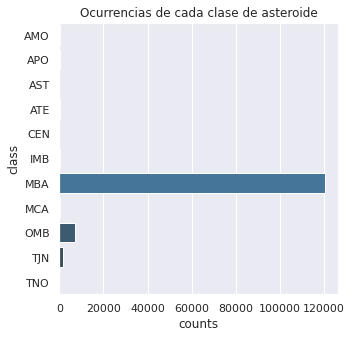

['ATE' 'CEN' 'IMB' 'MCA']


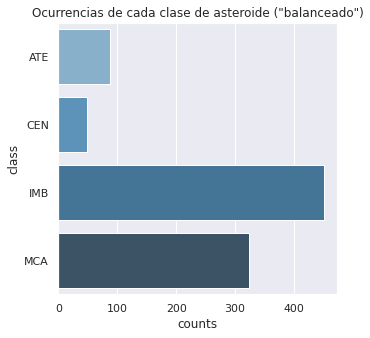

In [ ]:
# analizar distribuciones de las clases 

clases = np.unique([str(item) for item in data_asteroid_['class'].values])

kd = data_asteroid_.groupby(['class']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
sns.barplot(data=kd, y='class', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Ocurrencias de cada clase de asteroide')
plt.show()


# dejar solo clases "más balanceadas" en número de ejemplos. Los codigos comentados corresponden a las clases que se van a preservar.

data_asteroid_balanced = data_asteroid_[data_asteroid_["class"] != 'AMO']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'APO']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'AST']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'ATE']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'CEN']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'MBA']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'TNO']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'OMB']
data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'TJN']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'IMBA']
#data_asteroid_balanced = data_asteroid_balanced[data_asteroid_balanced["class"]  != 'MCA']



clases = np.unique([str(item) for item in data_asteroid_balanced['class'].values])
print(clases)


kd = data_asteroid_balanced.groupby(['class']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
sns.barplot(data=kd, y='class', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Ocurrencias de cada clase de asteroide ("balanceado")')
plt.show()


In [ ]:
# Definir features numericos (lo haremos para diferenciar despues X de Y ).
# En este caso, como eliminamos columnas con valores categóricos en lineas anteriores, la única columna no numérica es 'class'.  

non_categorial_asteriod = list(data_asteroid_balanced.columns)
non_categorial_asteriod.remove('class') 


A continuación veremos como se distribuyen los valores de una columna (feature) en las distintas clases. Para ello usaremos una herramienta de visualización que nos permite ver un histograma con la densidad de valores. 

Podemos apreciar que en features como "H" los valores se distribuyen de forma bien diferenciada dependiendo de la clase. Esto nos puede dar una pista de que el modelo podría aprovechar este feature para separar las clases entre sí. Por otro lado, existen columnas como "om" en donde los valores se distribuyen de forma similar para todas las clases, dificultando la separación de clases.


['ATE' 'CEN' 'IMB' 'MCA']
910


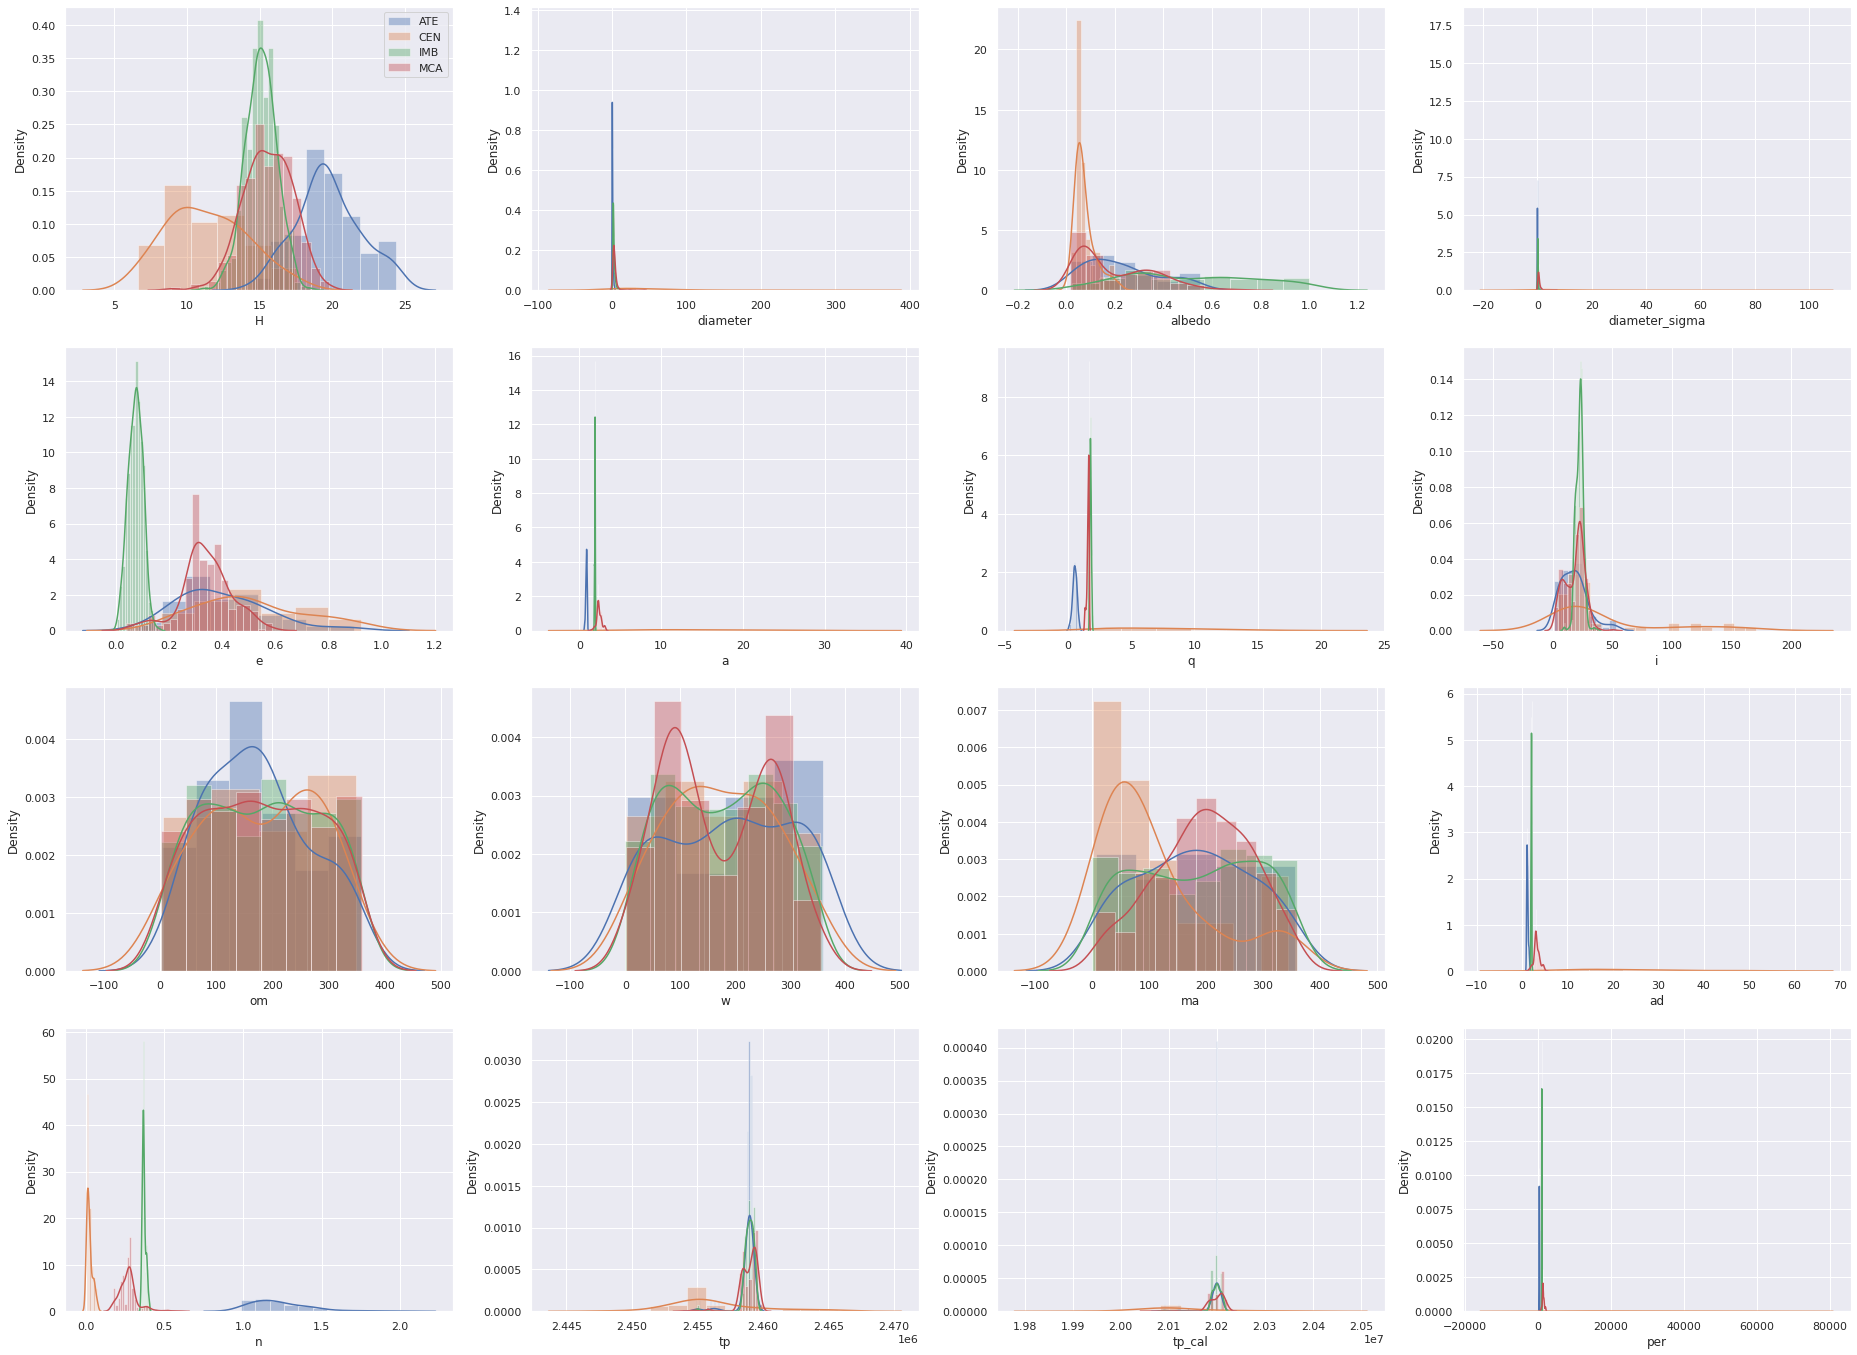

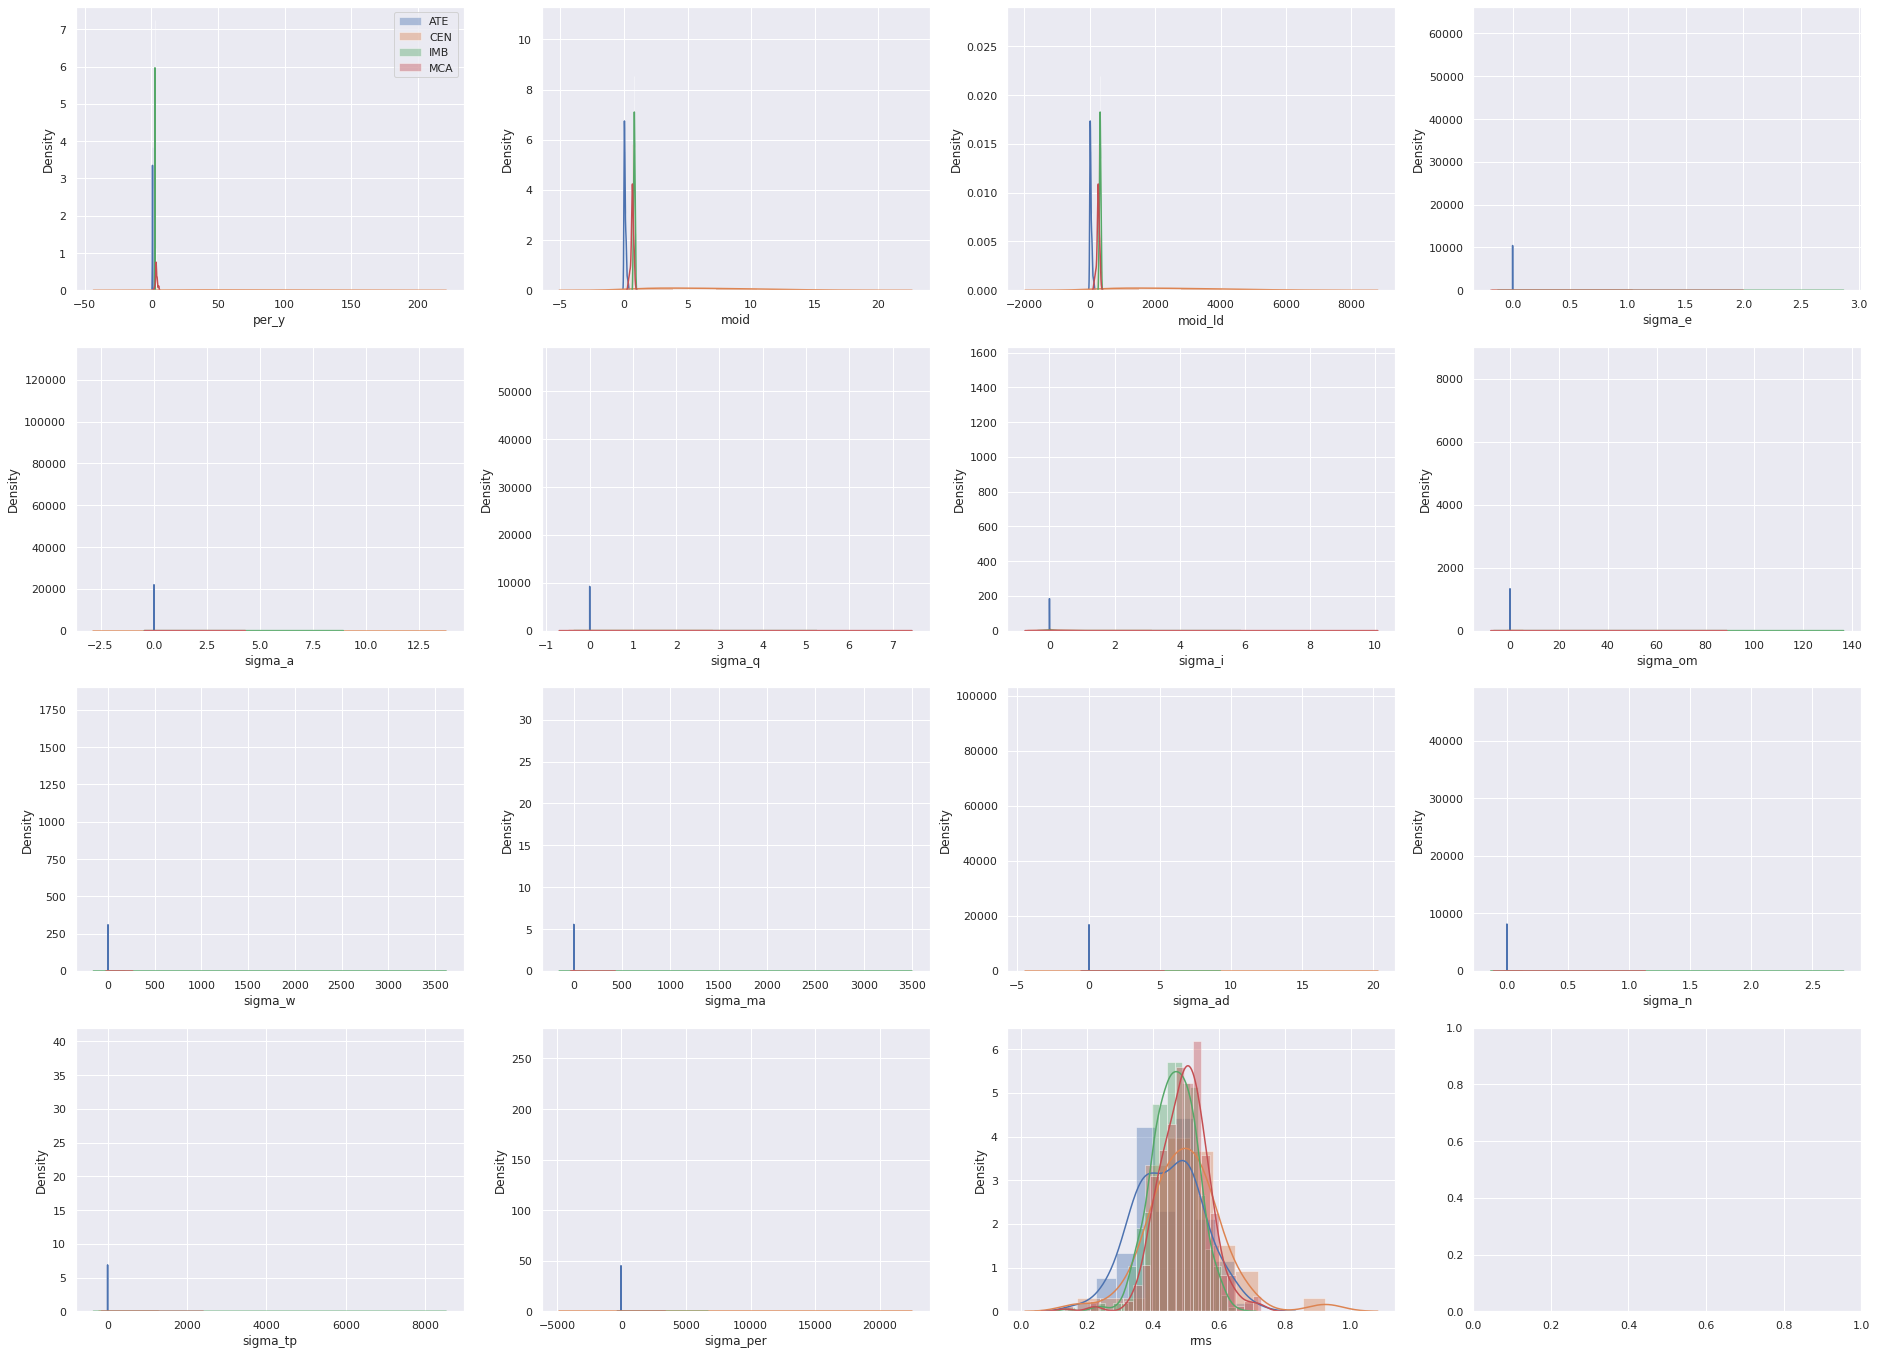

In [ ]:
print(clases)

print(len(data_asteroid_balanced))

# primeros 15 features
fig, axes = plt.subplots(figsize=(32,24), nrows=4, ncols=4)
for i, column in enumerate(non_categorial_asteriod[:16]):
    for c in clases:
      target = data_asteroid_balanced.loc[data_asteroid_balanced['class'] == c]

      sns.distplot(target[column], hist=True, rug=False, kde=True, ax=axes[i//4, i%4], label = c)
 

      if i==0:
        axes[0,0].legend()
ax.set_title( label = "", color = 'w')
plt.show()

# el resto de features
fig, axes = plt.subplots(figsize=(32,24), nrows=4, ncols=4)
for i, column in enumerate(non_categorial_asteriod[16:]):
    for c in clases:
      target = data_asteroid_balanced.loc[data_asteroid_balanced['class'] == c]

      sns.distplot(target[column], hist=True, rug=False, kde=True, ax=axes[i//4, i%4], label = c)
      if i==0:
        axes[0,0].legend()
ax.set_title( label = "", color = 'w')
plt.show()


In [ ]:
# Separar datos para el posterior entrenamiento, validación y test

# Split de datos
X = data_asteroid_balanced[non_categorial_asteriod]
y = data_asteroid_balanced['class']

# one hot para las clases
y_ = pd.get_dummies(y)

print(X.shape)
print(y_.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X_train.head()

(910, 31)
(910, 4)
X,y Shapes: (910, 31) (910,)
X,y Train Shapes: (582, 31) (582, 4)
X,y Val Shapes: (146, 31) (146, 4)
X,y Test Shapes: (182, 31) (182, 4)


,H,diameter,albedo,diameter_sigma,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
67377,15.7,3.222,0.074,0.343,0.045039,1.986439,1.896971,19.324551,290.319692,315.772461,85.308548,2.075907,0.352039,2.458758e+06,2.019100e+07,1022.612867,2.799761,0.898297,349.590243,3.690400e-08,7.775100e-09,7.413300e-08,0.000007,0.000012,0.000081,0.000081,8.125300e-09,2.066900e-09,0.000229,0.000006,0.48556
676043,17.1,2.029,0.047,0.481,0.060729,1.870714,1.757106,14.844674,61.006012,342.402142,132.365127,1.984321,0.385206,2.454988e+06,2.009061e+07,934.564802,2.558699,0.769016,299.277957,7.637000e-01,2.285400e+00,3.554500e+00,5.389700,33.527000,587.210000,557.300000,2.424200e+00,7.058800e-01,833.020000,1712.600000,0.13881
16680,14.3,4.328,0.230,0.053,0.063641,1.893439,1.772940,23.416223,342.481955,63.934531,125.466279,2.013939,0.378292,2.458669e+06,2.019070e+07,951.646304,2.605466,0.817502,318.147253,6.523800e-08,6.973600e-09,1.207900e-07,0.000006,0.000009,0.000056,0.000050,7.417400e-09,2.089900e-09,0.000133,0.000005,0.40610
677905,16.5,2.816,0.056,0.595,0.371763,2.194821,1.378867,27.434525,71.133017,35.802738,251.144433,3.010776,0.303114,2.454529e+06,2.008030e+07,1187.673883,3.251674,0.440214,171.318082,1.240800e+00,3.308800e+00,4.586600e+00,9.337900,63.733000,182.490000,158.900000,4.538900e+00,6.854400e-01,2248.600000,2685.700000,0.35743
3168,12.7,4.662,0.960,0.118,0.066634,1.892181,1.766097,24.906466,96.372205,32.672842,139.137595,2.018265,0.378669,2.458633e+06,2.019053e+07,950.697421,2.602868,0.796836,310.104666,3.484800e-08,5.415000e-09,6.694700e-08,0.000006,0.000012,0.000054,0.000052,5.775800e-09,1.625500e-09,0.000137,0.000004,0.33411


Viendo directamente los histogramas anteriores se puede concluir que las columnas tienen rango de valores muy distintos. Para estos casos, estandarizar los datos antes de aplicar un modelo nos ayudará a obtener mejores resultados. 

WARNING: cuidado con aplicar esto antes de separar en train, validation y test. Si aplicamos una función como StandardScaler() con todos los datos (sin la separación) haremos que el futuro conjunto de test deje de ser independiente del conjunto train. Esto puede provocar que el modelo tenga un buen rendimiento en testing cuando en realidad el modelo simplemente aprovecha que los datos test hayan sido escalados junto a train, es decir, ¡esta haciendo trampa!  

In [ ]:
# Scaling
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


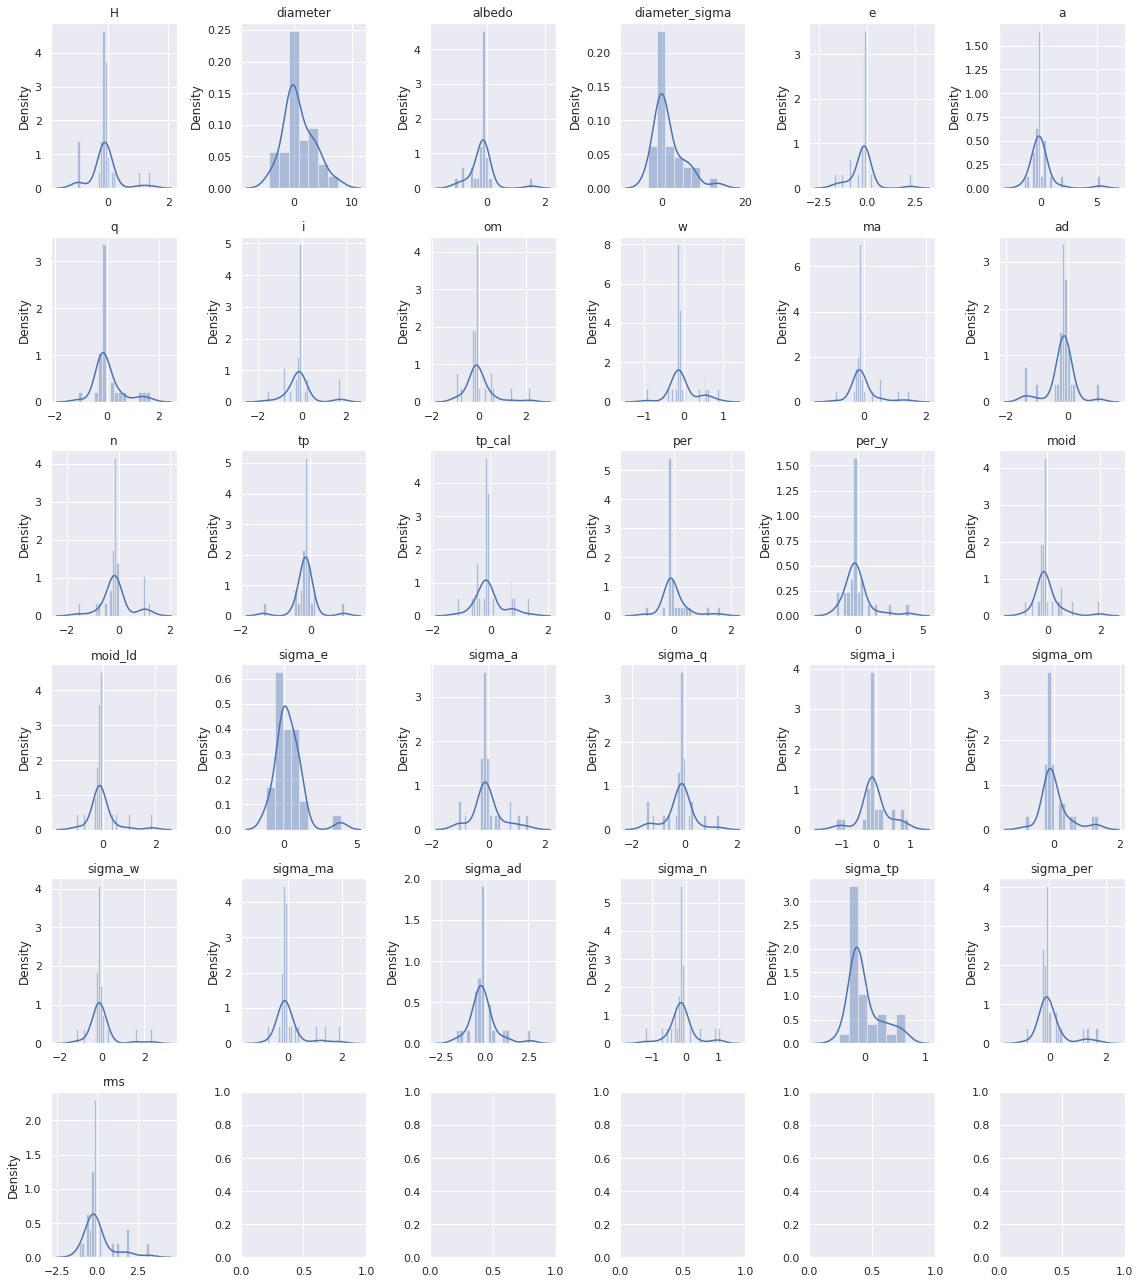

In [ ]:
# notar visualmente el efecto del scaling 

fig, axes = plt.subplots(figsize=(16,3*int(np.ceil(len(non_categorial_asteriod)/6))),nrows=int(np.ceil(len(non_categorial_asteriod)/6)), ncols=6)
for i, column in enumerate(non_categorial_asteriod):
      sns.distplot(X_train[i],ax=axes[i//6,i%6])
      axes[i//6,i%6].set_xlabel("")
      axes[i//6,i%6].set_title(column)
fig.tight_layout()
plt.show()

### Modelo 

n_features:  31
n_classes:  4
Model: "ModeloFuncAsteroid"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Asteroid (InputLayer)  [(None, 31)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                320       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                220       
_________________________________________________________________
Output (Dense)               (None, 4)                 84        
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


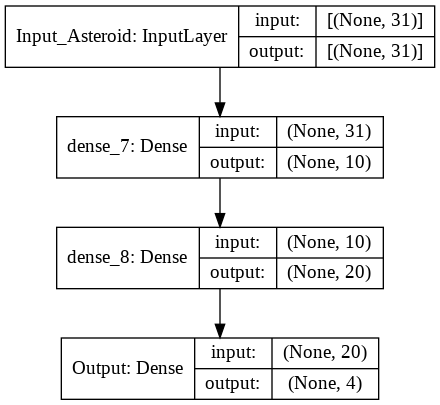

In [ ]:
n_features = X_train.shape[1]
n_classes = y_train.shape[1]

print("n_features: ", n_features)
print("n_classes: ", n_classes)

inputs = keras.Input(shape=(n_features, ), name='Input_Asteroid')
x = layers.Dense(10, activation='relu')(inputs)
x = layers.Dense(20, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax', name='Output')(x)
 
model2 = keras.Model(inputs=inputs, outputs=outputs, name='ModeloFuncAsteroid')
model2.summary()

keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
# Compilar el modelo. Se utiliza loss Categorical Crossentropy y métrica Accuracy
model2.compile(loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

_batch_size = 128 # Numero de ejemplos por gradient update.
         
print("Ejemplos de entrenamiento: {n_t}".format(n_t = X_train.shape[0] ) )

# Entrenar modelo
history = model2.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=20,
    verbose=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)


Ejemplos de entrenamiento: 582
Epoch 1/20
5/5 - 1s - loss: 1.3838 - accuracy: 0.1942 - val_loss: 1.3267 - val_accuracy: 0.3014
Epoch 2/20
5/5 - 0s - loss: 1.2970 - accuracy: 0.3213 - val_loss: 1.2753 - val_accuracy: 0.3630
Epoch 3/20
5/5 - 0s - loss: 1.2425 - accuracy: 0.4158 - val_loss: 1.2309 - val_accuracy: 0.4384
Epoch 4/20
5/5 - 0s - loss: 1.1951 - accuracy: 0.4897 - val_loss: 1.1902 - val_accuracy: 0.5000
Epoch 5/20
5/5 - 0s - loss: 1.1508 - accuracy: 0.5515 - val_loss: 1.1479 - val_accuracy: 0.5822
Epoch 6/20
5/5 - 0s - loss: 1.1065 - accuracy: 0.6117 - val_loss: 1.1050 - val_accuracy: 0.6438
Epoch 7/20
5/5 - 0s - loss: 1.0615 - accuracy: 0.6684 - val_loss: 1.0618 - val_accuracy: 0.6712
Epoch 8/20
5/5 - 0s - loss: 1.0164 - accuracy: 0.7096 - val_loss: 1.0164 - val_accuracy: 0.7055
Epoch 9/20
5/5 - 0s - loss: 0.9704 - accuracy: 0.7405 - val_loss: 0.9705 - val_accuracy: 0.7123
Epoch 10/20
5/5 - 0s - loss: 0.9238 - accuracy: 0.7577 - val_loss: 0.9243 - val_accuracy: 0.7397
Epoch 11

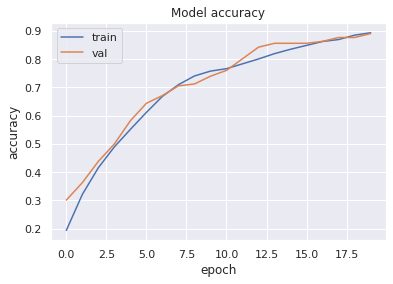

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Finalmente, veremos la predicción de clases en el conjunto de test

In [ ]:
# Predecir datos de test con el modelo entrenado
Y_pred = model2.predict(X_test)

print("Predicciones para los 3 primeros ejemplos de validación: ") 
print(Y_pred[0:3])

print("\nNotar que cada uno suma 1 gracias a la Softmax (probabilidad válida)")
print(np.sum(Y_pred[0]))

Predicciones para los 3 primeros ejemplos de validación: 
[[0.04 0.1  0.64 0.22]
 [0.8  0.08 0.04 0.07]
 [0.04 0.05 0.27 0.64]]

Notar que cada uno suma 1 gracias a la Softmax (probabilidad válida)
1.0


In [ ]:
# Obtener clase con activación más alta (mayor probabilidad) para todas las predicciones. 
Y_pred = np.argmax(Y_pred, axis=1)

print(Y_pred[0:20])

# Encodear como one-hot para comparar con el output esperado
Y_pred = tf.one_hot(Y_pred, depth=n_classes).numpy()


[2 0 3 3 3 3 2 0 2 3 2 2 2 2 0 2 2 2 3 2]


In [ ]:
print("Model Accuracy sobre conjunto Test: ")
print(accuracy_score(y_test, Y_pred))

names = y_.columns

np.set_printoptions(precision=2)
print(classification_report(y_test, Y_pred, target_names=names))

Model Accuracy sobre conjunto Test: 
0.9010989010989011
              precision    recall  f1-score   support

         ATE       1.00      0.96      0.98        26
         CEN       1.00      0.73      0.84        11
         IMB       0.85      1.00      0.92        83
         MCA       0.94      0.77      0.85        62

   micro avg       0.90      0.90      0.90       182
   macro avg       0.95      0.87      0.90       182
weighted avg       0.91      0.90      0.90       182
 samples avg       0.90      0.90      0.90       182



# Ejemplo 4 (Múltiples Entradas): Clasificación multimodal con rectángulos y elipses

In [26]:
import cv2
import random
import os
import matplotlib.image as mpimg
from PIL import Image

La arquitectura del modelo funcional de Keras no se restringe a un único Input (o a un único Output): podemos crear una red con múltiples entradas/salidas! A continuación se presenta un problema de clasificación usando una red neuronal de 2 Inputs: una imagen y 2 atributos numéricos (features) por ejemplo de entrenamiento.

El dataset presentado a continuación fue creado para esta actividad usando imágenes originales provenientes de https://www.kaggle.com/ignazio/rectangle-ellipse-multimodal

Las imágenes originales corresponden a 2 tipos de figuras geométricas en 2 posibles tamaños:

*small_rectangle, big_ rectangle, small_ellipse y big_ellipse*


Para hacer más interesantes las figuras, las imágenes fueron editadas de la siguiente forma:

> Para cada imágen:
> * Agregar entre 0-3 círculos fuera de la figura.  
> * Hacer entre 0-3 agujeros circulares dentro de la figura.

Si el número de agujeros es mayor al número de círculos fuera de la figura diremos que es una figura **In**, en el caso contrario diremos que la figura es **Out**. De esta forma, tendremos un total de **8 clases**:

*small_rectangle_in, big_ rectangle_in, small_ellipse_in,  big_ellipse_in*

*small_rectangle_out, big_ rectangle_out, small_ellipse_out y big_ellipse_out*

La clasificación de clases considera 2 Inputs, en donde cada ejemplo considera:
* Una imagen (en escala de grises)
* Dos features númericos: la cantidad de agujeros dentro de la figura y la cantidad de círculos fuera de la figura.  


In [29]:
# descomprimir archivo zip que contiene imágenes.
if (colab_flag):
    !echo $path
    !unzip $path/new_images_rectangles_ellipse.zip


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: new_images/1099.jpg     
  inflating: new_images/11.jpg       
  inflating: new_images/110.jpg      
  inflating: new_images/1100.jpg     
  inflating: new_images/11004.jpg    
  inflating: new_images/11012.jpg    
  inflating: new_images/11014.jpg    
  inflating: new_images/11016.jpg    
  inflating: new_images/11018.jpg    
  inflating: new_images/11021.jpg    
  inflating: new_images/11022.jpg    
  inflating: new_images/11032.jpg    
  inflating: new_images/11037.jpg    
  inflating: new_images/11038.jpg    
  inflating: new_images/11039.jpg    
  inflating: new_images/11040.jpg    
  inflating: new_images/11042.jpg    
  inflating: new_images/11043.jpg    
  inflating: new_images/11046.jpg    
  inflating: new_images/11047.jpg    
  inflating: new_images/11048.jpg    
  inflating: new_images/11049.jpg    
  inflating: new_images/11050.jpg    
  inflating: new_images/11052.jpg    
  inflating: new_images/110

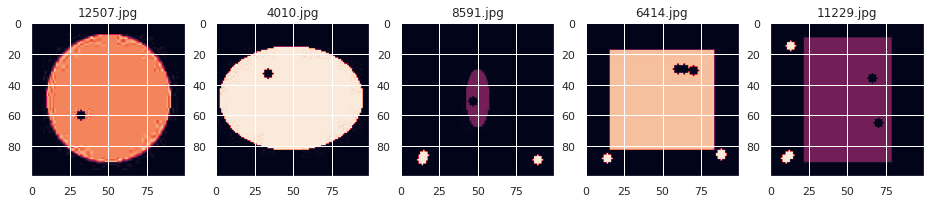

In [30]:

img_folder = 'new_images'

fig = plt.figure(figsize=(16, 16))

for i in range(5):
    file = random.choice(os.listdir(img_folder)) # elección aleatoria
    image_path= os.path.join(img_folder, file)
    
    img= mpimg.imread(image_path)
    
    ax = fig.add_subplot(1, 5,i+1)
    
    ax.title.set_text(file)
    plt.imshow(img)

In [31]:
if (colab_flag):
    # cambie esta ruta a la necesaria según sea el caso. El arhivo es new_rectangles_ellipses.csv
    data_rectangles_ellipses = pd.read_csv(path + '/new_rectangles_ellipses.csv' ,header=0,engine='python')
else:
    data_rectangles_ellipses = pd.read_csv('new_rectangles_ellipses.csv' ,header=0,engine='python')

In [32]:
data_rectangles_ellipses.head()

,Unnamed: 0,class,in,out,id
0,0,big_ellipse_in,3,1,10
1,1,big_ellipse_out,0,0,100
2,2,big_ellipse_in,3,1,10002
3,3,small_ellipse_in,2,0,10004
4,4,small_rectangle_out,0,1,10007


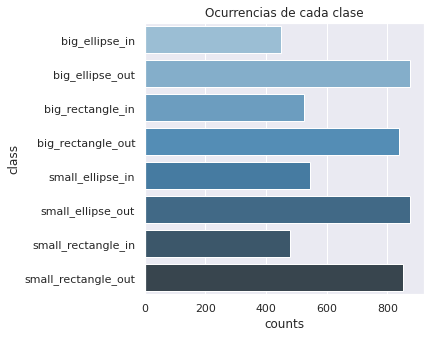

In [33]:
# distribución de clases

kd = data_rectangles_ellipses.groupby(['class']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
sns.barplot(data=kd, y='class', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Ocurrencias de cada clase')
plt.show()

In [34]:

# cargar datos de imágenes y features numéricos
def create_image_feature_dataset(img_folder):
   
    data = []
    class_name = []
    ids = []
   
    for filename in os.listdir(img_folder):
       
        #print(filename)
        
        image_path = os.path.join(img_folder, filename)
        image = cv2.imread( image_path,  0) # # using 0 to read image in grayscale mode
        image = cv2.resize(image, (25, 25)) # 25 x 25
        image = np.array(image)
        image = image.astype('float32')
        image /= 255 
        
        id = filename.split('.')[0]

        # obtener la clase correspondiente en los datos del csv usando la id de la imagen
        c = data_rectangles_ellipses.loc[data_rectangles_ellipses['id'] == int(id)]['class'].values[0]
        n_in = data_rectangles_ellipses.loc[data_rectangles_ellipses['id'] == int(id)]['in'].values[0]
        n_out = data_rectangles_ellipses.loc[data_rectangles_ellipses['id'] == int(id)]['out'].values[0]
        
        #print(image.shape)

        data.append([n_in, n_out, image])
        class_name.append(c)
        ids.append(id)
    
    return np.array(data), np.array(class_name), np.array(ids)

# extract the image array and class name
img_folder = '/content/new_images'

img_feature_data, class_names, ids = create_image_feature_dataset(img_folder)

print(img_feature_data.shape)

(5437, 3)


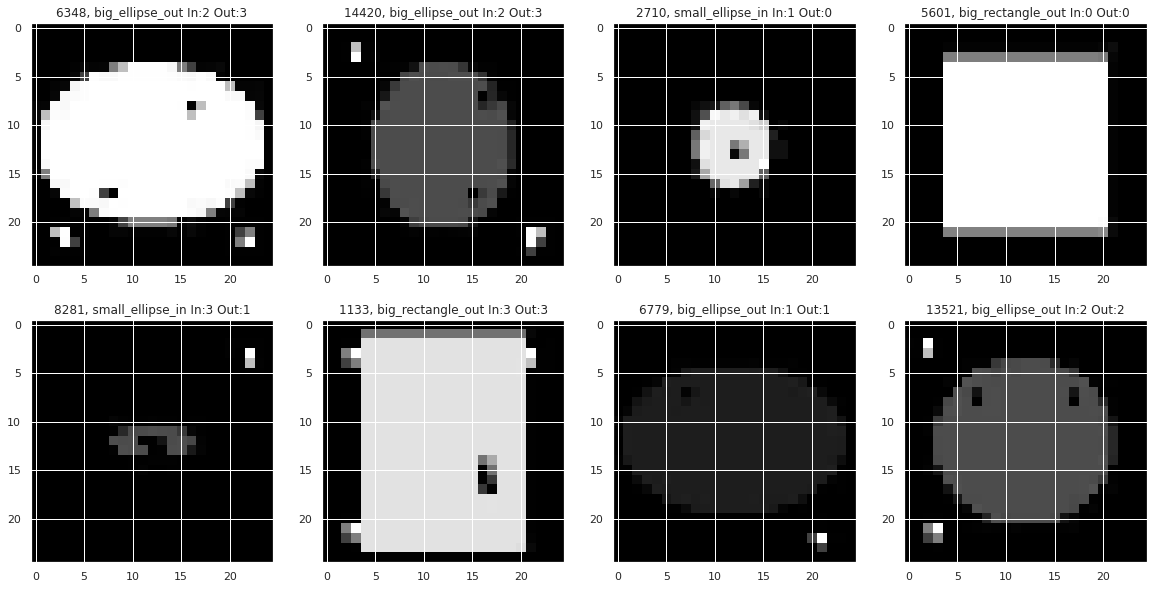

In [35]:

fig = plt.figure(figsize=(20, 10))

for i in range(8):
    img = Image.fromarray(np.uint8(img_feature_data[i][2] * 255) , 'L')
    
    ax = fig.add_subplot(2, 4, i+1)
    ax.title.set_text(ids[i] + ', ' + class_names[i] + ' In:' + str( img_feature_data[i][0]) + ' Out:' + str( img_feature_data[i][1]) )

    plt.imshow(img, cmap='gray', interpolation='none')
    

In [36]:
n_classes = 8

X = img_feature_data

# codificación one-hot para clases
Y = pd.get_dummies(class_names) 

print(X.shape)
print(Y.shape)

# split en train, val y test
_validation_split = 0.2

# Split de los ejemplos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=_validation_split, random_state=0)

print("X,y Shapes:", X1.shape, Y1_.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)



(5437, 3)
(5437, 8)
X,y Shapes: (8000, 3) (8000, 4)
X,y Train Shapes: (3479, 3) (3479, 8)
X,y Val Shapes: (870, 3) (870, 8)
X,y Test Shapes: (1088, 3) (1088, 8)


In [37]:
# como vamos a tener 2 inputs, separamos cada conjunto en dos: uno de features (número de in y número de out) y otro de imágenes

X_train_features = np.asarray(X_train[:, :2]).astype('float32') # input features
X_train_images = np.array(X_train[:, 2].tolist()) # input images

X_val_features = np.asarray(X_val[:, :2]).astype('float32') # input features
X_val_images = np.array(X_val[:, 2].tolist()) # input images

X_test_features = np.asarray(X_test[:, :2]).astype('float32') # input features
X_test_images = np.array(X_test[:, 2].tolist()) # input images


print(X_train_features.shape)
print(X_train_images.shape)
print(X_val_features.shape)
print(X_val_images.shape)
print(X_test_features.shape)
print(X_test_images.shape)

(3479, 2)
(3479, 25, 25)
(870, 2)
(870, 25, 25)
(1088, 2)
(1088, 25, 25)


In [38]:
# Transformar las imágenes de 25x25 a un vector de 625 elementos
# Mas adelante en el curso veremos una forma de crear redes especializadas en imágenes. 

new_dimension = X_train_images.shape[1] *  X_train_images.shape[2] # 25 x 25 = 625

X_train_images = X_train_images.reshape(X_train_images.shape[0], new_dimension)
X_val_images = X_val_images.reshape(X_val_images.shape[0], new_dimension)
X_test_images = X_test_images.reshape(X_test_images.shape[0], new_dimension)

# ahora tenemos 3479 ejemplos de entrenamiento donde las imágenes corresponden a vectores con 625 valores
print(X_train_images.shape)
print(X_val_images.shape)
print(X_test_images.shape)

(3479, 625)
(870, 625)
(1088, 625)


### Modelo

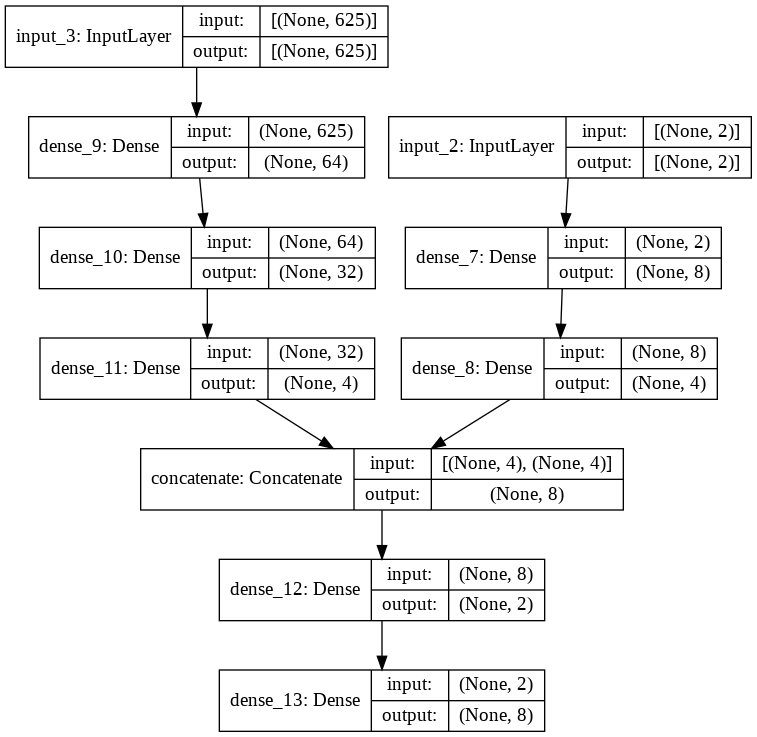

In [39]:
# Arquitectura del ejemplo de https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/


# definir ambos inputs
input_features = layers.Input(shape=( X_train_features.shape[1] ) ) # 2 unidades 
input_images = layers.Input(shape=( X_train_images.shape[1]) ) # 625 unidades

# la primera rama opera en el input de features
x = layers.Dense(8, activation="relu")(input_features)
x = layers.Dense(4, activation="relu")(x)
x = keras.Model(inputs=input_features, outputs=x)

# la segunda rama opera en el input de images
y = layers.Dense(64, activation="relu")(input_images)
y = layers.Dense(32, activation="relu")(y)
y = layers.Dense(4, activation="relu")(y)
y = keras.Model(inputs=input_images, outputs=y)

# combinar el output de ambas ramas 
combined = layers.concatenate([x.output, y.output])

z = layers.Dense(2, activation="relu")(combined)
z = layers.Dense(8, activation="softmax")(z) # para predecir clases

model3 = keras.Model(inputs=[x.input, y.input], outputs=z)

keras.utils.plot_model(model3, show_shapes=True)

In [40]:
# Compilar el modelo. Se utiliza loss Categorical Crossentropy y métrica Accuracy
model3.compile(loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

_batch_size = 32 # Numero de ejemplos por gradient update.
_validation_split = 0.2

n_mini_batchs = int(np.ceil(X_train_features.shape[0] / _batch_size)) # cantidad de mini batch para un epoch
         
print("Ejemplos de entrenamiento: {n_t}".format(n_t = X_train_features.shape[0] ) )
print("Número de mini-batch por epoch: ", n_mini_batchs)

# Entrenar modelo
history = model3.fit(
    x = [X_train_features, X_train_images],
    y = y_train,
    batch_size=_batch_size,
    epochs=20,
    verbose=2,
    validation_data=([X_val_features, X_val_images], y_val),
)

Ejemplos de entrenamiento: 3479
Número de mini-batch por epoch:  109
Epoch 1/20
109/109 - 1s - loss: 1.9582 - accuracy: 0.2619 - val_loss: 1.9220 - val_accuracy: 0.3184
Epoch 2/20
109/109 - 0s - loss: 1.8561 - accuracy: 0.3558 - val_loss: 1.8380 - val_accuracy: 0.4172
Epoch 3/20
109/109 - 0s - loss: 1.7722 - accuracy: 0.3878 - val_loss: 1.7499 - val_accuracy: 0.3425
Epoch 4/20
109/109 - 0s - loss: 1.6974 - accuracy: 0.4041 - val_loss: 1.6973 - val_accuracy: 0.4425
Epoch 5/20
109/109 - 0s - loss: 1.6310 - accuracy: 0.4349 - val_loss: 1.6670 - val_accuracy: 0.4805
Epoch 6/20
109/109 - 0s - loss: 1.5398 - accuracy: 0.4955 - val_loss: 1.5822 - val_accuracy: 0.4770
Epoch 7/20
109/109 - 0s - loss: 1.4454 - accuracy: 0.5254 - val_loss: 1.4897 - val_accuracy: 0.5115
Epoch 8/20
109/109 - 0s - loss: 1.3636 - accuracy: 0.5300 - val_loss: 1.3881 - val_accuracy: 0.5276
Epoch 9/20
109/109 - 0s - loss: 1.3036 - accuracy: 0.5433 - val_loss: 1.3793 - val_accuracy: 0.5310
Epoch 10/20
109/109 - 0s - loss

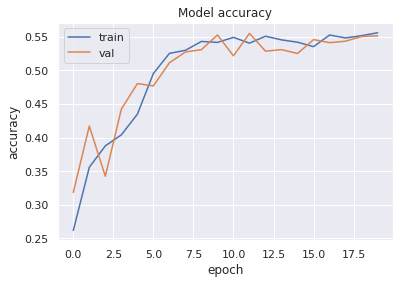

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
# Predecir datos de validación con el modelo entrenado
Y_pred = model3.predict([X_test_features, X_test_images])

print("Predicciones para los 3 primeros ejemplos de validación: ") 
print(Y_pred[0:3])

print("\nNotar que cada uno suma 1 gracias a la Softmax (probabilidad válida)")
print(np.sum(Y_pred[0]))

Predicciones para los 3 primeros ejemplos de validación: 
[[2.60e-04 9.57e-03 6.00e-02 1.35e-01 2.40e-05 4.36e-01 1.84e-05 3.59e-01]
 [1.29e-03 2.00e-02 4.52e-02 4.42e-02 4.56e-04 4.72e-01 3.53e-04 4.16e-01]
 [5.89e-04 1.33e-02 4.62e-02 6.29e-02 1.31e-04 4.71e-01 1.02e-04 4.06e-01]]

Notar que cada uno suma 1 gracias a la Softmax (probabilidad válida)
1.0


In [43]:
# Obtener clase con activación más alta (mayor probabilidad) para todas las predicciones. 
Y_pred = np.argmax(Y_pred, axis=1)

print(Y_pred[0:20])

# Encodear como one-hot para comparar con el output esperado
Y_pred = tf.one_hot(Y_pred, depth=8).numpy()
#Y_pred = pd.get_dummies(Y_pred) 

Y_pred

[5 5 5 1 7 3 4 5 5 1 1 4 1 4 6 1 3 5 1 5]


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [44]:
print("Model Accuracy sobre conjunto Test: ")
print(accuracy_score(y_test, Y_pred))

np.set_printoptions(precision=2)
print(classification_report(y_test, Y_pred, target_names=Y.columns))

Model Accuracy sobre conjunto Test: 
0.5808823529411765
                     precision    recall  f1-score   support

     big_ellipse_in       0.00      0.00      0.00        98
    big_ellipse_out       0.55      0.92      0.69       169
   big_rectangle_in       1.00      0.08      0.14       103
  big_rectangle_out       0.61      0.91      0.73       161
   small_ellipse_in       0.57      0.76      0.65       103
  small_ellipse_out       0.53      0.73      0.61       176
 small_rectangle_in       0.67      0.44      0.53        98
small_rectangle_out       0.65      0.41      0.50       180

          micro avg       0.58      0.58      0.58      1088
          macro avg       0.57      0.53      0.48      1088
       weighted avg       0.58      0.58      0.52      1088
        samples avg       0.58      0.58      0.58      1088



# Ejemplo 5 (Múltiples Salidas):  Clasificación y regresión sobre rectángulos y elipses

La arquitectura del modelo funcional de Keras no se restringe a un único Output (ni un único Input): podemos crear una red con múltiples entradas/salidas. A continuación se presenta un problema de clasificación y regresión usando una red neuronal de 1 Input: una imagen por ejemplo de entrenamiento y 2 Outputs: un valor numérico y la clase a la que pertenece la imagen.

El dataset presentado a continuación fue creado para esta actividad usando imágenes originales provenientes de https://www.kaggle.com/ignazio/rectangle-ellipse-multimodal

Las imágenes originales corresponden a 2 tipos figuras geométricas separadas en dos tamaños:

*small_rectangle, big_ rectangle, small_ellipse y big_ellipse*

De esta forma tendremos **4 clases**.

Para hacer más interesantes las figuras, las imágenes fueron editadas de la siguiente forma:

> Para cada imágen:
> * Agregar entre 0-3 circulos fuera de la figura.  
> * Hacer entre 0-3 agujeros circulares dentro de la figura.

Se define una métrica llamada **rate**, que corresponde a 

\begin{align}
rate = \frac{Agujeros + 1}{CirculosExternos + 1}
\end{align}

La red buscará usar una capa de salida para la clasificación de la clase y otra capa de salida para una regresión del **valor de rate**.

In [45]:
import cv2
import random
import os
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
# descomprimir archivo zip que contiene imágenes.
'''
if (colab_flag):
    !echo $path
    !unzip $path/new_images_rectangles_ellipse.zip
'''

'\nif (colab_flag):\n    !echo $path\n    !unzip $path/new_images_rectangles_ellipse.zip\n'

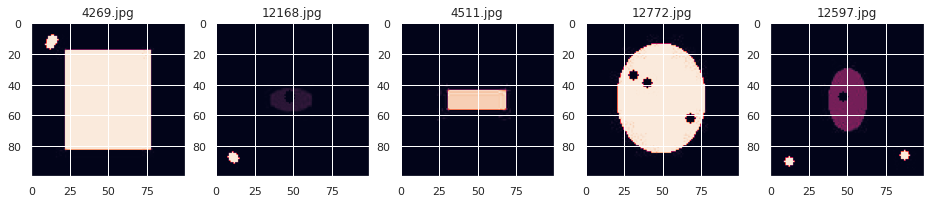

In [47]:

img_folder = 'new_images'

fig = plt.figure(figsize=(16, 16))

for i in range(5):
    file = random.choice(os.listdir(img_folder)) # elección aleatoria
    image_path= os.path.join(img_folder, file)
    
    img= mpimg.imread(image_path)
    
    ax = fig.add_subplot(1, 5,i+1)
    
    ax.title.set_text(file)
    plt.imshow(img)



In [48]:
if (colab_flag):
    # cambie esta ruta a la necesaria según sea el caso. El arhivo es new_rectangles_ellipses_2.csv   
    data_rectangles_ellipses = pd.read_csv(path + '/new_rectangles_ellipses_2.csv' ,header=0,engine='python')
else:
    data_rectangles_ellipses = pd.read_csv('new_rectangles_ellipses_2.csv' ,header=0,engine='python')

In [49]:
data_rectangles_ellipses.head()

,Unnamed: 0,class,in,out,id
0,0,big_ellipse,3,1,10
1,1,big_ellipse,0,0,100
2,2,big_ellipse,3,1,10002
3,3,small_ellipse,2,0,10004
4,4,small_rectangle,0,1,10007


In [52]:
# Agregamos una columna con el rate:
# rate = (agujeros en la figura + 1) / (número de cirulos fuera de la figura + 1)

data_rectangles_ellipses["rate"] = (data_rectangles_ellipses['in'] + 1)/(data_rectangles_ellipses['out'] + 1)

data_rectangles_ellipses.head()

,Unnamed: 0,class,in,out,id,rate
0,0,big_ellipse,3,1,10,2.0
1,1,big_ellipse,0,0,100,1.0
2,2,big_ellipse,3,1,10002,2.0
3,3,small_ellipse,2,0,10004,3.0
4,4,small_rectangle,0,1,10007,0.5


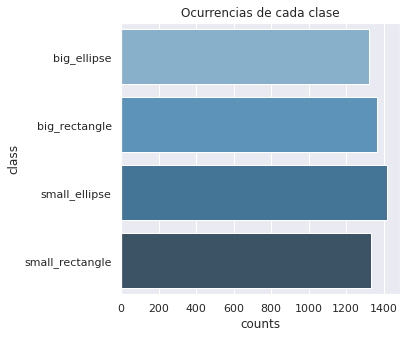

In [51]:
# distribución de clases

kd = data_rectangles_ellipses.groupby(['class']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
sns.barplot(data=kd, y='class', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Ocurrencias de cada clase')
plt.show()

In [53]:

# cargar datos de imágenes y features numéricos
def create_image_feature_dataset(img_folder):
   
    data = []
    ids = []
   
    for filename in os.listdir(img_folder):
       
        #print(filename)
        
        image_path = os.path.join(img_folder, filename)
        image = cv2.imread( image_path,  0) # # using 0 to read image in grayscale mode
        image = cv2.resize(image, (25, 25)) # 25 x 25
        image = np.array(image)
        image = image.astype('float32')
        image /= 255 
        
        id = filename.split('.')[0]

        # obtener la clase correspondiente en los datos del csv usando la id de la imagen
        c = data_rectangles_ellipses.loc[data_rectangles_ellipses['id'] == int(id)]['class'].values[0]
        rate = data_rectangles_ellipses.loc[data_rectangles_ellipses['id'] == int(id)]['rate'].values[0]

        

        data.append([c, rate, image])
        ids.append(id)
    
    return np.array(data), np.array(ids)

# extract the image array and features
img_folder = '/content/new_images'

img_feature_data,  ids = create_image_feature_dataset(img_folder)

# img_feature_data: clases, rate, image

print(img_feature_data.shape)

(5437, 3)


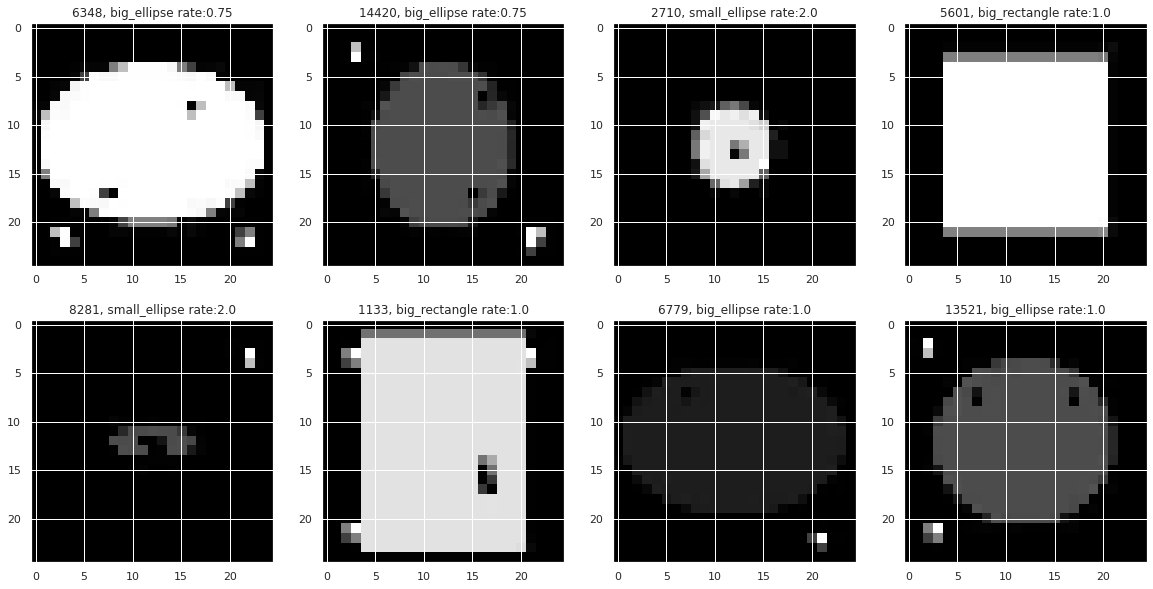

In [54]:

fig = plt.figure(figsize=(20, 10))

for i in range(8):
    img = Image.fromarray(np.uint8(img_feature_data[i][2] * 255) , 'L')
    
    ax = fig.add_subplot(2, 4, i+1)
    ax.title.set_text(ids[i] + ', ' + str(img_feature_data[i][0]) + ' rate:' + str( img_feature_data[i][1])  )

    plt.imshow(img, cmap='gray', interpolation='none')
    

In [55]:

img_feature_data_ = img_feature_data.copy()

clases_one_hot = pd.get_dummies(img_feature_data[:, 0])

# eliminar class original para reempalzarlo por su one-hot
img_feature_data_ = np.delete(img_feature_data_, 0, axis = 1) 
print(img_feature_data_.shape)


img_feature_data_ = np.concatenate((clases_one_hot, img_feature_data_), axis=1)
print(img_feature_data_.shape)

# observar el one-hot 
print(img_feature_data_[:, :4])


(5437, 2)
(5437, 6)
[[1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 ...
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]]


In [56]:
n_classes = 4

X = np.array(img_feature_data_[:, 5].tolist()) # las imágenes
Y = img_feature_data_[:, :5] # clases (one-hot), rates

print(X.shape)
print(Y.shape)

# split en train, val y test
_validation_split = 0.2

# Split de los ejemplos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=_validation_split, random_state=0)

print("X,y Shapes:", X1.shape, Y1_.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)



(5437, 25, 25)
(5437, 5)
X,y Shapes: (8000, 3) (8000, 4)
X,y Train Shapes: (3479, 25, 25) (3479, 5)
X,y Val Shapes: (870, 25, 25) (870, 5)
X,y Test Shapes: (1088, 25, 25) (1088, 5)


In [57]:
# como hay un output numérico (rate) y un output categórico (clases), debemos separarlos:

y_train_clases =    np.asarray(y_train[:, :4]).astype('float32') # output clase
y_train_feature = np.asarray(y_train[:, 4]).astype('float32') # output feature

y_val_clases =    np.asarray(y_val[:, :4]).astype('float32') # output clase
y_val_feature = np.asarray(y_val[:, 4]).astype('float32') # output feature

y_test_clases =    np.asarray(y_test[:, :4]).astype('float32') # output clase
y_test_feature = np.asarray(y_test[:, 4]).astype('float32') # output feature

print(y_train_clases.shape)
print(y_train_feature.shape)

(3479, 4)
(3479,)


In [58]:
# Transformar las imágenes de 25x25 a un vector de 625 elementos
# Mas adelante en el curso veremos una forma de crear redes especializadas en imágenes. 

new_dimension = X_train.shape[1] *  X_train.shape[2] # 25 x 25 = 625

X_train = X_train.reshape(X_train.shape[0], new_dimension)
X_val = X_val.reshape(X_val.shape[0], new_dimension)
X_test = X_test.reshape(X_test.shape[0], new_dimension)

# ahora tenemos 3479 ejemplos de entrenamiento donde las imágenes corresponden a vectores con 625 valores
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3479, 625)
(870, 625)
(1088, 625)


### Modelo

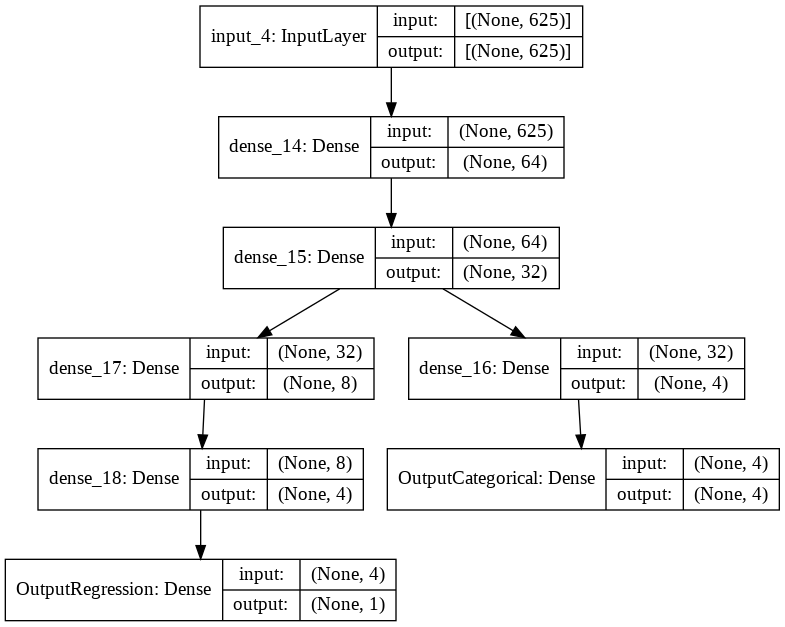

In [59]:
# Rama para la imagen basada del ejemplo de https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

# definir input
input_images = layers.Input(shape=( X_train.shape[1]) ) # 625 unidades

# operar en el input de images
x = layers.Dense(64, activation="relu")(input_images)
x1 = layers.Dense(32, activation="relu")(x)
x = layers.Dense(4, activation="relu")(x1)

# rama exclusiva para los features
y = layers.Dense(8, activation="relu")(x1)
y = layers.Dense(4, activation="relu")(y)


# outputs
z1 = layers.Dense(4, activation="softmax", name="OutputCategorical")(x) # para predecir clases
z2 = layers.Dense(1, activation="linear", name="OutputRegression")(y) # para predecir el feature (rate)

model4 = keras.Model(inputs=input_images, outputs=[z1, z2])

keras.utils.plot_model(model4, show_shapes=True)

In [60]:
losses = {
	"OutputCategorical": "categorical_crossentropy",
	"OutputRegression": "mse",
}

metrics_ = {
    "OutputCategorical": "accuracy",
	"OutputRegression": "mean_squared_error",
}

model4.compile(loss=losses, metrics=metrics_, optimizer='adam')

_batch_size = 128 # Numero de ejemplos por gradient update.


n_mini_batchs = int(np.ceil(X_train_features.shape[0] / _batch_size)) # cantidad de mini batch para un epoch
         
print("Ejemplos de entrenamiento: {n_t}".format(n_t = X_train_features.shape[0] ) )
print("Número de mini-batch por epoch: ", n_mini_batchs)


# Entrenar modelo
history = model4.fit(
    x = X_train,
    y = [y_train_clases, y_train_feature],
    batch_size=_batch_size,
    epochs=20,
    verbose=2,
    validation_data=(X_val, [y_val_clases, y_val_feature]),
)

Ejemplos de entrenamiento: 3479
Número de mini-batch por epoch:  28
Epoch 1/20
28/28 - 1s - loss: 2.7930 - OutputCategorical_loss: 1.2524 - OutputRegression_loss: 1.5406 - OutputCategorical_accuracy: 0.4263 - OutputRegression_mean_squared_error: 1.5406 - val_loss: 2.6492 - val_OutputCategorical_loss: 1.2028 - val_OutputRegression_loss: 1.4463 - val_OutputCategorical_accuracy: 0.5724 - val_OutputRegression_mean_squared_error: 1.4463
Epoch 2/20
28/28 - 0s - loss: 2.3962 - OutputCategorical_loss: 1.1644 - OutputRegression_loss: 1.2318 - OutputCategorical_accuracy: 0.5841 - OutputRegression_mean_squared_error: 1.2318 - val_loss: 2.4130 - val_OutputCategorical_loss: 1.1792 - val_OutputRegression_loss: 1.2338 - val_OutputCategorical_accuracy: 0.6069 - val_OutputRegression_mean_squared_error: 1.2338
Epoch 3/20
28/28 - 0s - loss: 2.1448 - OutputCategorical_loss: 1.1349 - OutputRegression_loss: 1.0099 - OutputCategorical_accuracy: 0.6154 - OutputRegression_mean_squared_error: 1.0099 - val_loss:

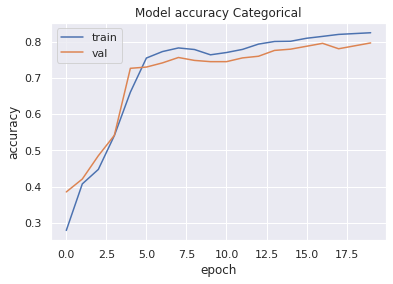

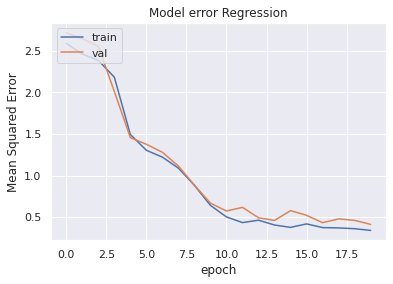

In [ ]:
plt.plot(history.history['OutputCategorical_accuracy'])
plt.plot(history.history['val_OutputCategorical_accuracy'])
plt.title('Model accuracy Categorical')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['OutputRegression_mean_squared_error'])
plt.plot(history.history['val_OutputRegression_mean_squared_error'])
plt.title('Model error Regression')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

